# CDS503 - Machine Learning Final Project

Universiti Sains Malaysia


Group 11 - **Wine Quality Prediction Using Classification**

Members:
- JIN WENHUA
- MA RU
- GUO ZIRUI
- CHEN wenxian

## Overview

### Experiment Set 1: Comparing machine learning algorithms  

* JIN WENHUA

### Experiment Set 2: Selecting features

* MA RU

### Experiment Set 3: Ensemble learning

* CHEN WENXIAN 

### Experiment Set 4: Varying training sample size

* GUO ZIRUI


# 1. Data Preparation

In [2]:
import pandas as pd
import numpy as np



In [3]:
df = pd.read_csv('winequality-white.csv', delimiter = ';')
#display the metadata or summary of the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [4]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


## Identify each attribute and its type

The data has 4898 rows. There are 11 features will be used to classify the quality of wine, many of them are chemical, so we need to have a basic understanding of such chemicals.

*  fixed_acidity :   Primary fixed acids found in wine are tartaric, succinic, citric, and malic
*  volatile_acidity :   Volatile acidity is the gaseous acids present in wine.
* citric_acid :    It is weak organic acid, found in citrus fruits naturally.
* residual_sugar :   Amount of sugar left after fermentation.
* chlorides :   Amount of salt present in wine.
* free_sulfur_dioxide :   So2 is used for prevention of wine by oxidation and microbial spoilage.
* total sulfur dioxide 
* density 
* pH :   In wine pH is used for checking acidity
* sulphates :    Added sulfites preserve freshness and protect wine from oxidation, and bacteria.
* alcohol :   Percent of alcohol present in wine.


array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

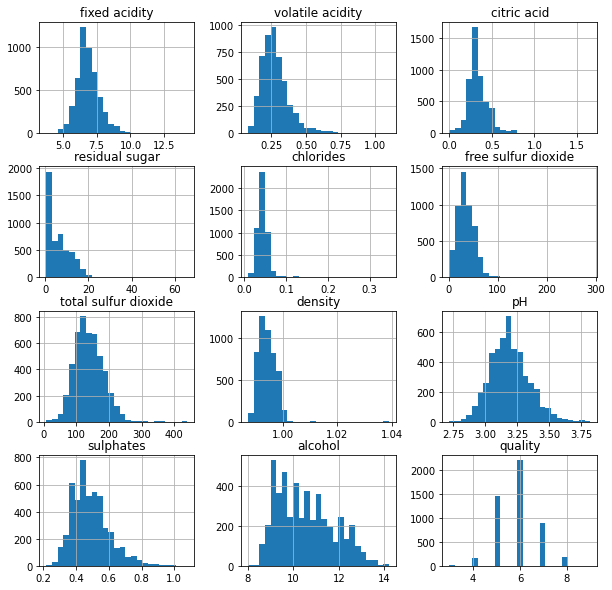

In [5]:
df.hist(bins=25,figsize=(10,10))

<AxesSubplot:>

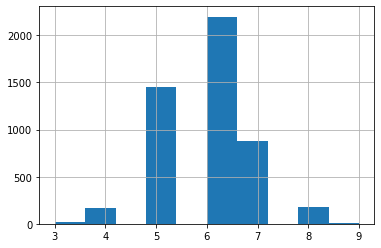

In [6]:
df['quality'].hist()

In [7]:
df['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [8]:
cut_bins = [1, 4, 6, 9]
df['quality'] = pd.cut(df['quality'], bins = cut_bins, labels = [0, 1, 2])
df['quality'].value_counts()

1    3655
2    1060
0     183
Name: quality, dtype: int64

In [9]:
#save the preprocess data
df.to_csv(r'winequality-preprocess.csv', index = False, header = True)

# Experiment Set 1: Comparing Machine Learning Algorithms

In this experiment set, we pick f1_weighted as the metric. 
- Firstly, run baseline performance of the different machine learning algorithms by using the default parameters. 
- Secondly, Use the GridSearch to find and report the most optimal parameter. 
- Finally, run the best performing model and compare with the baseline performance.


The list of machine learning algorithms are:

- K-Nearest Neighbors
- Decision Tree
- SVM

In [10]:
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn import metrics
#import function for k-fold cross validation 
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier
#import decision tree classifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC

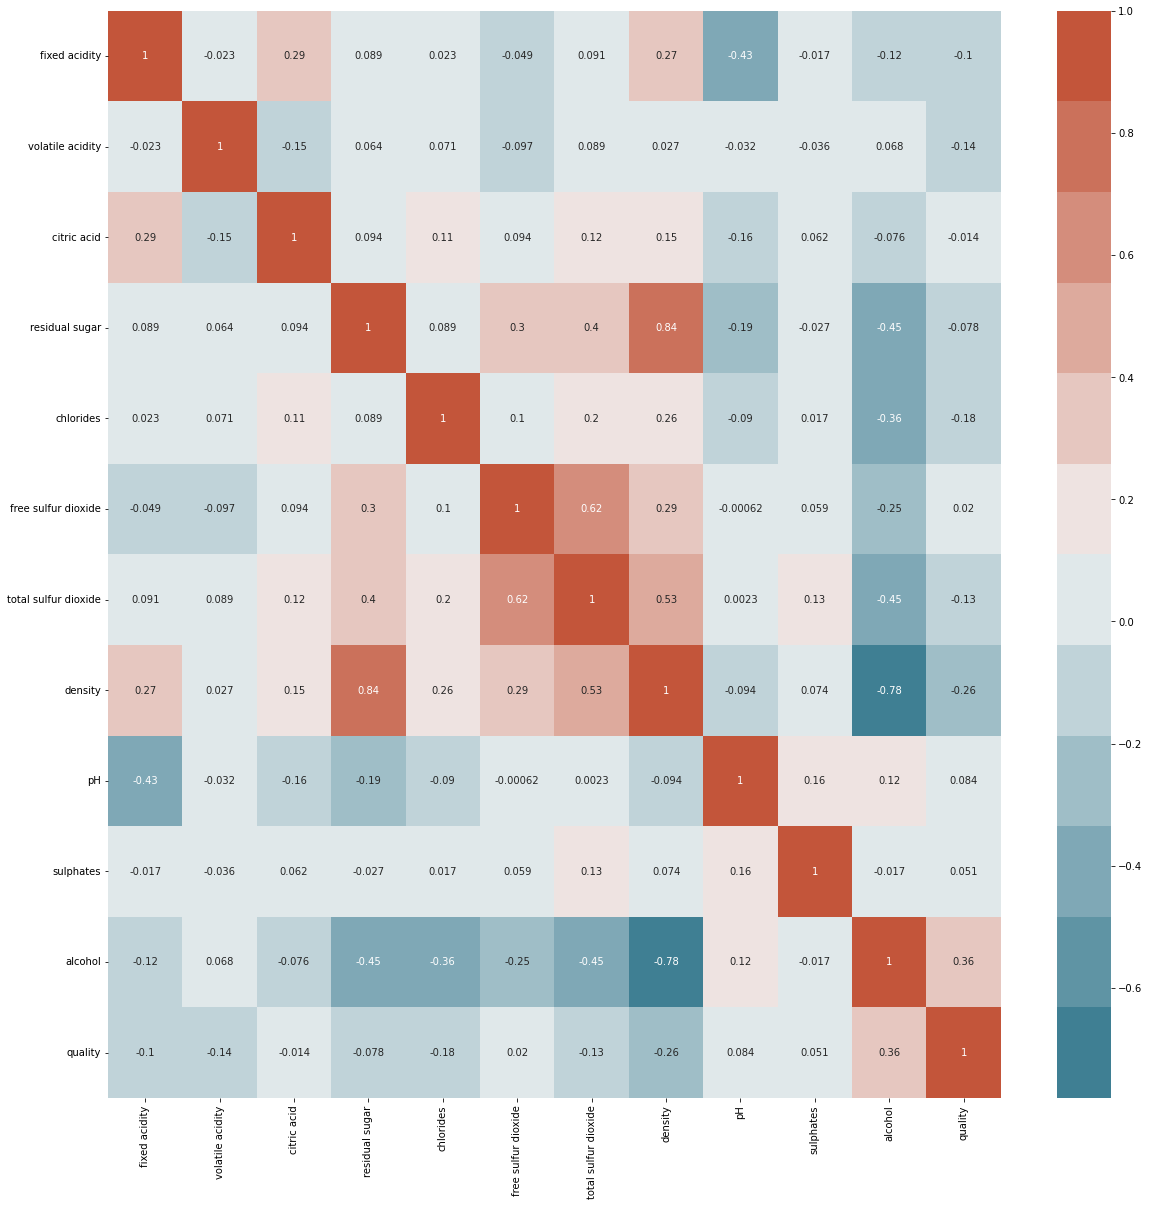

In [11]:
df = pd.read_csv('winequality-preprocess.csv')
plt.figure(figsize=(20,20))
df_corr = df.corr()
sns.heatmap(df_corr, cmap=sns.diverging_palette(220,20,n=12), annot = True)
plt.show()

In [12]:
#Indicate the target column
target = df['quality']

#Indicatethe columns that will serve as features.
features = df.drop('quality', axis = 1)

scaler = StandardScaler()
features = scaler.fit_transform(features)

In [13]:

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 0)

Tuning Parameter: we use f1_weighted as performing metric

In [14]:
def best_parameter(param_grid, estimator):
    #fit on the dataset on all parameter combinations in param_grid 
    #retain the best conbination 
    #because our data is unbalanced data, we use f1_weighted
    grid_search = GridSearchCV(estimator, param_grid, cv = 5, scoring = 'f1_weighted')
    #Train model while tuning the parameters using grid search 
    grid_result = grid_search.fit(x_train, y_train)
    #display the best parameter c value 
    print(grid_result.best_params_)
    print(grid_search.best_score_)
    print(grid_search.best_estimator_)
    return grid_search

In [15]:
def validation(estimator):
    #train model 
    estimator.fit(x_train, y_train)

    #predict the target for the test dataset 
    test_predict = estimator.predict(x_test)

    print(estimator.__class__)

    scores = cross_val_score(estimator, x_train, y_train, cv =5, scoring = 'f1_weighted')
    print("f1_weighted(validation) = ", scores.mean())
    
    #compute the model f1_weighted on the development set: How often is the classifier correct?
    print("f1_weighted(test):{}".format(metrics.f1_score(y_test, test_predict, average='weighted')))

    #print confusion matrix
    print(confusion_matrix(y_test, test_predict))

    #print precision, recall and f1 
    print(classification_report(y_test, test_predict))

## 1.1 K-Nearest Neighbors

In [16]:
validation(KNeighborsClassifier())

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
f1_weighted(validation) =  0.7770169633074812
f1_weighted(test):0.73810698786335
[[  5  52   3]
 [  5 631  68]
 [  0 106 110]]
              precision    recall  f1-score   support

           0       0.50      0.08      0.14        60
           1       0.80      0.90      0.85       704
           2       0.61      0.51      0.55       216

    accuracy                           0.76       980
   macro avg       0.64      0.50      0.51       980
weighted avg       0.74      0.76      0.74       980



In [17]:
#the param_grid specifies one grid should be explored 
param_grid = {"n_neighbors":[1,3, 5,7, 9, 11], "weights" : ['uniform', 'distance'], 
              "algorithm" : ['auto', 'ball_tree', 'kd_tree', 'brute'],
              "p":[1,2,3]}

best_parameter(param_grid, KNeighborsClassifier())

In [ ]:
validation(KNeighborsClassifier(n_neighbors=11, p=1, weights='distance'))

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
f1_weighted(validation) =  0.8292807834702943
f1_weighted(test):0.7779318549916966
[[  4  55   1]
 [  0 653  51]
 [  0  86 130]]
              precision    recall  f1-score   support

           0       1.00      0.07      0.12        60
           1       0.82      0.93      0.87       704
           2       0.71      0.60      0.65       216

    accuracy                           0.80       980
   macro avg       0.85      0.53      0.55       980
weighted avg       0.81      0.80      0.78       980



## 1.2 Decision Tree

In [ ]:
validation(DecisionTreeClassifier())

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
f1_weighted(validation) =  0.784510702034665
f1_weighted(test):0.7267058658944483
[[ 10  46   4]
 [ 19 592  93]
 [  6  92 118]]
              precision    recall  f1-score   support

           0       0.29      0.17      0.21        60
           1       0.81      0.84      0.83       704
           2       0.55      0.55      0.55       216

    accuracy                           0.73       980
   macro avg       0.55      0.52      0.53       980
weighted avg       0.72      0.73      0.73       980



In [ ]:
#the param_grid specifies one grid should be explored 
param_grid = {"criterion":["gini", "entropy"], 
              "splitter" : ["best", "random"], 
              "max_depth":[7, 8, 9, 10, 11, 12, 13, 14, None]}

best_parameter(param_grid, DecisionTreeClassifier())

{'criterion': 'entropy', 'max_depth': None, 'splitter': 'best'}
0.7824260881611718
DecisionTreeClassifier(criterion='entropy')


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [7, 8, 9, 10, 11, 12, 13, 14, None],
                         'splitter': ['best', 'random']},
             scoring='f1_weighted')

In [ ]:
validation(DecisionTreeClassifier(criterion='entropy'))

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
f1_weighted(validation) =  0.7844156635690783
f1_weighted(test):0.743214086699022
[[  9  46   5]
 [ 17 604  83]
 [  1  89 126]]
              precision    recall  f1-score   support

           0       0.33      0.15      0.21        60
           1       0.82      0.86      0.84       704
           2       0.59      0.58      0.59       216

    accuracy                           0.75       980
   macro avg       0.58      0.53      0.54       980
weighted avg       0.74      0.75      0.74       980



## 1.3 SVM

In [ ]:
validation(SVC())

<class 'sklearn.svm._classes.SVC'>
f1_weighted(validation) =  0.7569532661622315
f1_weighted(test):0.7083401182418172
[[  0  60   0]
 [  0 675  29]
 [  0 147  69]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.77      0.96      0.85       704
           2       0.70      0.32      0.44       216

    accuracy                           0.76       980
   macro avg       0.49      0.43      0.43       980
weighted avg       0.70      0.76      0.71       980



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [ ]:
#the param_grid specifies one grid should be explored 
param_grid = {"C":[1, 10, 100, 1000]}

#fit on the dataset on all parameter combinations in param_grid 
#retain the best conbination 
best_parameter(param_grid, SVC(kernel = 'linear'))

{'C': 100}
0.7570448721915268
SVC(C=100, kernel='linear')


GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 10, 100, 1000]}, scoring='f1_weighted')

In [ ]:
param_grid = {"C":[1, 10, 100, 1000], 'degree':[1,2,3,4,5]}
best_parameter(param_grid, SVC(kernel = 'poly'))

{'C': 10, 'degree': 5}
0.7463614718295586
SVC(C=10, degree=5, kernel='poly')


GridSearchCV(cv=5, estimator=SVC(kernel='poly'),
             param_grid={'C': [1, 10, 100, 1000], 'degree': [1, 2, 3, 4, 5]},
             scoring='f1_weighted')

In [ ]:
param_grid = {"C":[1, 10, 100, 1000], 'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0, 'scale', 'auto']}
best_parameter(param_grid, SVC(kernel = 'rbf'))

{'C': 1, 'gamma': 0.5}
0.7701258899347325
SVC(C=1, gamma=0.5)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0, 'scale', 'auto']},
             scoring='f1_weighted')

In [ ]:
param_grid = {"C":[1, 10, 100, 1000], 'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0, 'scale', 'auto'], 
               "coef0":[0,1,10]}
best_parameter(param_grid, SVC(kernel = 'sigmoid'))

{'C': 1, 'coef0': 0, 'gamma': 0.1}
0.7318200285934926
SVC(C=1, coef0=0, gamma=0.1, kernel='sigmoid')


GridSearchCV(cv=5, estimator=SVC(kernel='sigmoid'),
             param_grid={'C': [1, 10, 100, 1000], 'coef0': [0, 1, 10],
                         'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0, 'scale', 'auto']},
             scoring='f1_weighted')

In [ ]:
validation(SVC(C=1, gamma=0.5))

<class 'sklearn.svm._classes.SVC'>
f1_weighted(validation) =  0.7919818954975618
f1_weighted(test):0.7469330871547311
[[  2  58   0]
 [  0 672  32]
 [  0 121  95]]
              precision    recall  f1-score   support

           0       1.00      0.03      0.06        60
           1       0.79      0.95      0.86       704
           2       0.75      0.44      0.55       216

    accuracy                           0.78       980
   macro avg       0.85      0.48      0.49       980
weighted avg       0.79      0.78      0.75       980



# Experiment Set 1: conclusion

obviously KNN is the best performing model, which has the highest weighted f1-score


# Experiment Set 2:  Select Features

In this experiment set, we compare the performance of different sets of features using different feature selection methods.

The list of methods used for feature selection are:<br>
* ANOVA
* Kendall's rank coefficient feature
* Recursive Feature Elimination (RFE)
    * Decision Tree algorithm
    * SVM algorithm
    * Bernoulli Naive Bayes algorithm

The following are the list of machine algorithms used for evaluating the model performance on the feature subsets.
* KNN: KNeighborsClassifier(n_neighbors = 11, p = 1, weights='distance')
* Decision Tree: DecisionTreeClassifier(criterion='entropy', random_state = 0)
* SVM: SVC(C=1, gamma=0.5, kernel = 'rbf')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('winequality-preprocess.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,2


We found that all the input variables are numercial and output variable is categorocal. The data type used for the select of feature selection method.

For Filter Approach, we can choose the ANOVA and Kendall's method while input variables are numercial and output is categorical.

In [3]:
#Indicate the target column
target = df['quality']

#Indicatethe columns that will serve as features.
features = df.drop('quality', axis = 1)

Befor the feture selection, scaler features is necessary.

In [4]:
# Scaler feature
cols = features.columns
scaler = StandardScaler()
features = scaler.fit_transform(features)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 0)

In [6]:
x_train_sc = pd.DataFrame(x_train, columns=cols)
x_test_sc = pd.DataFrame(x_test, columns=cols)

This function is used for evaluate model performance.

In [7]:
# Train and Evaluate model performance
def performance(estimators, x_train, x_test, y_train, y_test):

    def validation(estimator, x_train, y_train, name = None, cv = 5):
        estimator.fit(x_train, y_train)
        #predict the target for the test dataset 
        test_predict = estimator.predict(x_test)

        print(estimator.__class__)

        scores = cross_val_score(estimator, x_train, y_train, cv =5, scoring = 'f1_weighted')
        print("f1_weighted(validation) = ", scores.mean())
    
        #compute the model f1_weighted on the development set: How often is the classifier correct?
        print("f1_weighted(test):{}".format(metrics.f1_score(y_test, test_predict, average='weighted')))

        #print confusion matrix
        print(confusion_matrix(y_test, test_predict))

        #print precision, recall and f1 
        print(classification_report(y_test, test_predict))        
    
    # Print validation and test performance for all classifiers in the list.
    for estimator in estimators:
        
        validation(estimators[estimator], x_train, y_train, name = estimator)   
        
        print()

Below are the best parameters obtained in experiment set 1.

In [8]:
# Define 3 different estimators
estimators = {
    
    "KNN": KNeighborsClassifier(n_neighbors = 11, p = 1, weights='distance'),
    "Decision Tree": DecisionTreeClassifier(criterion='entropy', random_state = 0),
    "SVM": SVC(C=1, gamma=0.5, kernel = 'rbf')
}

## 2.1 ANOVA

ANOVA is an acronym for "analysis of variance" and is a parametric statistical hypothesis test. Importantly, ANOVA is used when one variable is numeric and one is categorical, such as numerical input variables and a classification target variable in a classification task.

We can define the SelectKBest class to use the f_classif() function and select k features, then transform the train and test sets.

Case 1: All features

In [9]:
# Case1: all features

# configure to select all features
selector = SelectKBest(score_func = f_classif, k = 'all')

# learn relationship from training data
selector.fit(x_train_sc, y_train)

# transform train input data
x_train_fs = selector.transform(x_train_sc)

# transform test input data
x_test_fs = selector.transform(x_test_sc)

# Selected features 
selected = x_train_sc.columns[selector.get_support()]
selected

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

We can then print the scores for each variable (larger is better) and plot the scores for each variable as a bar graph to get an idea of how many features we should select.

Feature 0: 15.804665
Feature 1: 75.398201
Feature 2: 7.722746
Feature 3: 38.858196
Feature 4: 69.915612
Feature 5: 30.892913
Feature 6: 56.460540
Feature 7: 178.080086
Feature 8: 16.858377
Feature 9: 4.669541
Feature 10: 349.409917


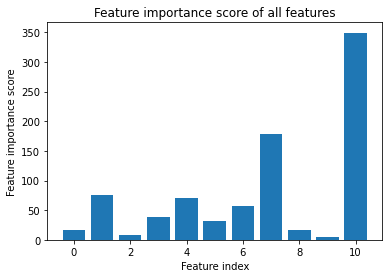

In [10]:
# what are scores for the features
for i in range(len(selector.scores_)):
    print('Feature %d: %f' % (i, selector.scores_[i]))
    
# plot the scores
plt.bar([i for i in range(len(selector.scores_))], selector.scores_)
plt.xlabel('Feature index')
plt.ylabel('Feature importance score')
plt.title('Feature importance score of all features')
plt.show()

In [11]:
performance(estimators, x_train_fs, x_test_fs, y_train, y_test)

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
f1_weighted(validation) =  0.8292807834702943
f1_weighted(test):0.7779318549916966
[[  4  55   1]
 [  0 653  51]
 [  0  86 130]]
              precision    recall  f1-score   support

           0       1.00      0.07      0.12        60
           1       0.82      0.93      0.87       704
           2       0.71      0.60      0.65       216

    accuracy                           0.80       980
   macro avg       0.85      0.53      0.55       980
weighted avg       0.81      0.80      0.78       980


<class 'sklearn.tree._classes.DecisionTreeClassifier'>
f1_weighted(validation) =  0.7851414836759589
f1_weighted(test):0.7403588313858527
[[ 10  47   3]
 [ 19 603  82]
 [  0  93 123]]
              precision    recall  f1-score   support

           0       0.34      0.17      0.22        60
           1       0.81      0.86      0.83       704
           2       0.59      0.57      0.58       216

    accuracy          

Case 2: Top 10 features

In [12]:
# Case2: 10 features

# configure to select top 10 features
selector = SelectKBest(score_func = f_classif, k = 10)

# learn relationship from training data
selector.fit(x_train_sc, y_train)

# transform train input data
x_train_fs = selector.transform(x_train_sc)

# transform test input data
x_test_fs = selector.transform(x_test_sc)

In [13]:
performance(estimators, x_train_fs, x_test_fs, y_train, y_test)

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
f1_weighted(validation) =  0.8178130654477895
f1_weighted(test):0.7770253262595361
[[  4  53   3]
 [  0 648  56]
 [  0  83 133]]
              precision    recall  f1-score   support

           0       1.00      0.07      0.12        60
           1       0.83      0.92      0.87       704
           2       0.69      0.62      0.65       216

    accuracy                           0.80       980
   macro avg       0.84      0.53      0.55       980
weighted avg       0.81      0.80      0.78       980


<class 'sklearn.tree._classes.DecisionTreeClassifier'>
f1_weighted(validation) =  0.7820159813423812
f1_weighted(test):0.7628485527764625
[[ 11  45   4]
 [ 15 619  70]
 [  1  86 129]]
              precision    recall  f1-score   support

           0       0.41      0.18      0.25        60
           1       0.83      0.88      0.85       704
           2       0.64      0.60      0.62       216

    accuracy          

Case 3: Top 9 features

In [14]:
# Case3: 9 features

# configure to select top 9 features
selector = SelectKBest(score_func = f_classif, k = 9)

# learn relationship from training data
selector.fit(x_train_sc, y_train)

# transform train input data
x_train_fs = selector.transform(x_train_sc)

# transform test input data
x_test_fs = selector.transform(x_test_sc)

In [15]:
performance(estimators, x_train_fs, x_test_fs, y_train, y_test)

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
f1_weighted(validation) =  0.8120424095220979
f1_weighted(test):0.7875167912657012
[[  6  53   1]
 [  0 664  40]
 [  0  90 126]]
              precision    recall  f1-score   support

           0       1.00      0.10      0.18        60
           1       0.82      0.94      0.88       704
           2       0.75      0.58      0.66       216

    accuracy                           0.81       980
   macro avg       0.86      0.54      0.57       980
weighted avg       0.82      0.81      0.79       980


<class 'sklearn.tree._classes.DecisionTreeClassifier'>
f1_weighted(validation) =  0.7794515701745262
f1_weighted(test):0.7466078467595161
[[  9  46   5]
 [ 12 615  77]
 [  2  93 121]]
              precision    recall  f1-score   support

           0       0.39      0.15      0.22        60
           1       0.82      0.87      0.84       704
           2       0.60      0.56      0.58       216

    accuracy          

Case 4: Top 8 features

In [16]:
# Case4: 8 features

# configure to select top 8 features
selector = SelectKBest(score_func = f_classif, k = 8)

# learn relationship from training data
selector.fit(x_train_sc, y_train)

# transform train input data
x_train_fs = selector.transform(x_train_sc)

# transform test input data
x_test_fs = selector.transform(x_test_sc)

In [17]:
performance(estimators, x_train_fs, x_test_fs, y_train, y_test)

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
f1_weighted(validation) =  0.8120411648840113
f1_weighted(test):0.7661714620904024
[[  5  55   0]
 [  0 648  56]
 [  0  94 122]]
              precision    recall  f1-score   support

           0       1.00      0.08      0.15        60
           1       0.81      0.92      0.86       704
           2       0.69      0.56      0.62       216

    accuracy                           0.79       980
   macro avg       0.83      0.52      0.55       980
weighted avg       0.80      0.79      0.77       980


<class 'sklearn.tree._classes.DecisionTreeClassifier'>
f1_weighted(validation) =  0.7812242936227234
f1_weighted(test):0.7552353793138713
[[ 10  49   1]
 [ 12 622  70]
 [  2  92 122]]
              precision    recall  f1-score   support

           0       0.42      0.17      0.24        60
           1       0.82      0.88      0.85       704
           2       0.63      0.56      0.60       216

    accuracy          

Case 5: Top 7 features

In [18]:
# Case5: 7 features

# configure to select top 7 features
selector = SelectKBest(score_func = f_classif, k = 7)

# learn relationship from training data
selector.fit(x_train_sc, y_train)

# transform train input data
x_train_fs = selector.transform(x_train_sc)

# transform test input data
x_test_fs = selector.transform(x_test_sc)

In [19]:
performance(estimators, x_train_fs, x_test_fs, y_train, y_test)

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
f1_weighted(validation) =  0.8084173962898928
f1_weighted(test):0.7706002420330352
[[  4  55   1]
 [  0 658  46]
 [  0  96 120]]
              precision    recall  f1-score   support

           0       1.00      0.07      0.12        60
           1       0.81      0.93      0.87       704
           2       0.72      0.56      0.63       216

    accuracy                           0.80       980
   macro avg       0.84      0.52      0.54       980
weighted avg       0.80      0.80      0.77       980


<class 'sklearn.tree._classes.DecisionTreeClassifier'>
f1_weighted(validation) =  0.7730666891205944
f1_weighted(test):0.7533287849057047
[[  6  52   2]
 [ 17 617  70]
 [  3  84 129]]
              precision    recall  f1-score   support

           0       0.23      0.10      0.14        60
           1       0.82      0.88      0.85       704
           2       0.64      0.60      0.62       216

    accuracy          

Case 6: Top 6 features

In [20]:
# Case6: 6 features

# configure to select top 6 features
selector = SelectKBest(score_func = f_classif, k = 6)

# learn relationship from training data
selector.fit(x_train_sc, y_train)

# transform train input data
x_train_fs = selector.transform(x_train_sc)

# transform test input data
x_test_fs = selector.transform(x_test_sc)

In [21]:
performance(estimators, x_train_fs, x_test_fs, y_train, y_test)

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
f1_weighted(validation) =  0.8129383850856728
f1_weighted(test):0.7694114171562799
[[  3  53   4]
 [  0 651  53]
 [  0  90 126]]
              precision    recall  f1-score   support

           0       1.00      0.05      0.10        60
           1       0.82      0.92      0.87       704
           2       0.69      0.58      0.63       216

    accuracy                           0.80       980
   macro avg       0.84      0.52      0.53       980
weighted avg       0.80      0.80      0.77       980


<class 'sklearn.tree._classes.DecisionTreeClassifier'>
f1_weighted(validation) =  0.777662688564685
f1_weighted(test):0.7496604415228085
[[ 12  41   7]
 [ 16 609  79]
 [  3  90 123]]
              precision    recall  f1-score   support

           0       0.39      0.20      0.26        60
           1       0.82      0.87      0.84       704
           2       0.59      0.57      0.58       216

    accuracy           

Case 7: Top 5 features

In [22]:
# Case7: 5 features

# configure to select top 5 features
selector = SelectKBest(score_func = f_classif, k = 5)

# learn relationship from training data
selector.fit(x_train_sc, y_train)

# transform train input data
x_train_fs = selector.transform(x_train_sc)

# transform test input data
x_test_fs = selector.transform(x_test_sc)

In [23]:
performance(estimators, x_train_fs, x_test_fs, y_train, y_test)

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
f1_weighted(validation) =  0.8045454959346101
f1_weighted(test):0.7616662244905236
[[  3  54   3]
 [  0 645  59]
 [  0  92 124]]
              precision    recall  f1-score   support

           0       1.00      0.05      0.10        60
           1       0.82      0.92      0.86       704
           2       0.67      0.57      0.62       216

    accuracy                           0.79       980
   macro avg       0.83      0.51      0.53       980
weighted avg       0.79      0.79      0.76       980


<class 'sklearn.tree._classes.DecisionTreeClassifier'>
f1_weighted(validation) =  0.7664290362469712
f1_weighted(test):0.73207503017589
[[ 10  44   6]
 [ 20 596  88]
 [  3  93 120]]
              precision    recall  f1-score   support

           0       0.30      0.17      0.22        60
           1       0.81      0.85      0.83       704
           2       0.56      0.56      0.56       216

    accuracy            

**Summary:** For this method, the best model is KNN classifier with the top 9 features. 

F1_weighted test score = 0.788

## 2.2 Kendall's 

Correlation between the target class label and features determines how correlated each variable with references to the target class. Kendall method is used for observing correlations between two features.

In [24]:
# Generate correlation matrix
x = pd.concat([x_train_sc, y_train], axis = 1)

cor = x.corr(method = 'kendall')

# Print correlation matrix
cor

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.020250,0.206467,0.079796,0.060320,-0.016052,0.083890,0.186285,-0.288337,-0.007879,-0.072622,0.016569
volatile acidity,-0.020250,1.000000,-0.093485,0.068410,0.003764,-0.062351,0.083153,0.011185,-0.033679,-0.009862,0.014401,-0.028143
citric acid,0.206467,-0.093485,1.000000,0.017878,0.023150,0.059182,0.065634,0.061105,-0.091389,0.057199,-0.017124,0.009419
residual sugar,0.079796,0.068410,0.017878,1.000000,0.161077,0.238679,0.295612,0.591933,-0.124755,-0.003306,-0.310225,-0.006806
chlorides,0.060320,0.003764,0.023150,0.161077,1.000000,0.119016,0.258019,0.352271,-0.036938,0.066980,-0.407274,-0.019259
free sulfur dioxide,-0.016052,-0.062351,0.059182,0.238679,0.119016,1.000000,0.444692,0.220797,-0.004567,0.042462,-0.187698,0.000103
total sulfur dioxide,0.083890,0.083153,0.065634,0.295612,0.258019,0.444692,1.000000,0.389791,-0.011817,0.114015,-0.328566,-0.021316
density,0.186285,0.011185,0.061105,0.591933,0.352271,0.220797,0.389791,1.000000,-0.074406,0.064373,-0.637385,-0.019028
pH,-0.288337,-0.033679,-0.091389,-0.124755,-0.036938,-0.004567,-0.011817,-0.074406,1.000000,0.094817,0.101964,0.016363
sulphates,-0.007879,-0.009862,0.057199,-0.003306,0.066980,0.042462,0.114015,0.064373,0.094817,1.000000,-0.026122,-0.027859


<AxesSubplot:>

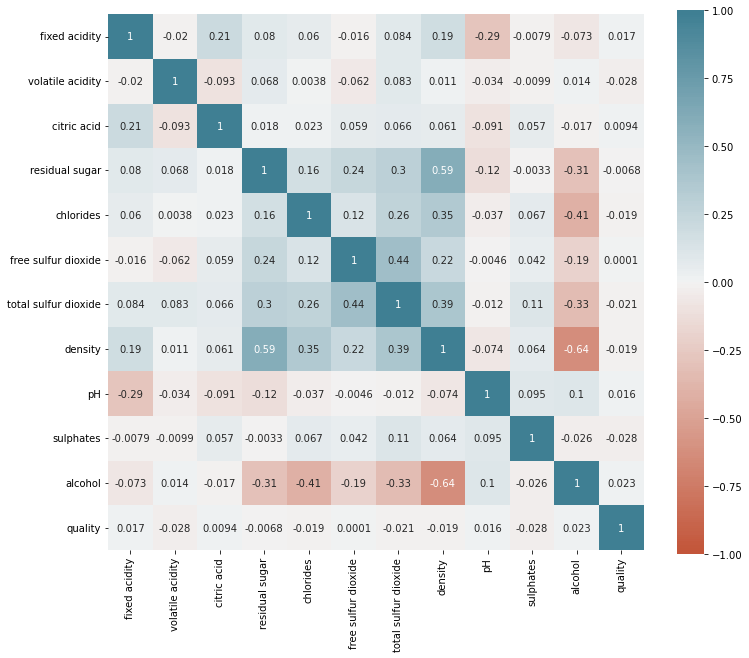

In [25]:
# Generating the correlation heatmap
# The heatmap is just a visualization of the correlation matrix 

# Set plot size
plt.figure(figsize=(12,10))

# Generate the heatmap
sns.heatmap(
    cor,
    vmin = -1, 
    vmax = 1, 
    center = 0,
    cmap = sns.diverging_palette(20, 220, n=200), 
    square = True,
    annot = True
)

In [26]:
# get the list of features which has correlation to the target column above a specified threshold value.
def corr_features(x_train, col_target, threshold):
   
    # Correlation with target
    # Apply abs() to get the absolute value so no need to deal with negative correlations
    cor_target = abs(cor[col_target])
    
    # Select highly correlated features, with threshold
    relevant_features = cor_target[cor_target > threshold]
    
    # Get names of the features which are highly correlated to the target. 
    cols = [col for col in relevant_features.index if col.lower() != col_target.lower()]
    
    return cols

Case 1: All features

In [27]:
# Case 1: All features (Threshold = 0.0001)
col_target = 'quality'
cols = corr_features(x_train_sc, col_target, threshold=0.0001)

x_train_cor = x_train_sc[cols]
x_test_cor = x_test_sc[cols]

x_train_cor.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.409125,-0.180992,-0.117278,0.790408,0.742829,-0.723775,-0.573277,0.860236,0.276407,0.001342,-0.011595
1,-1.724127,0.116674,0.378559,-1.023637,-0.767763,-0.253336,-0.149685,-1.697778,0.607565,-1.137868,1.532500
2,-0.420473,1.803445,-0.199917,-0.274357,-0.859314,-1.194214,-1.561658,-0.794949,0.475102,0.965289,0.801087
3,-0.183445,0.612783,-0.282557,1.815737,0.376625,0.922761,1.356420,1.395246,0.011480,0.001342,-0.986812
4,-0.894529,-1.173210,-0.530476,1.224201,0.834380,1.628419,0.556302,1.796503,3.124369,-0.524447,-1.311884


In [28]:
performance(estimators, x_train_cor, x_test_cor, y_train, y_test)

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
f1_weighted(validation) =  0.8292807834702943
f1_weighted(test):0.7779318549916966
[[  4  55   1]
 [  0 653  51]
 [  0  86 130]]
              precision    recall  f1-score   support

           0       1.00      0.07      0.12        60
           1       0.82      0.93      0.87       704
           2       0.71      0.60      0.65       216

    accuracy                           0.80       980
   macro avg       0.85      0.53      0.55       980
weighted avg       0.81      0.80      0.78       980


<class 'sklearn.tree._classes.DecisionTreeClassifier'>
f1_weighted(validation) =  0.7851414836759589
f1_weighted(test):0.7403588313858527
[[ 10  47   3]
 [ 19 603  82]
 [  0  93 123]]
              precision    recall  f1-score   support

           0       0.34      0.17      0.22        60
           1       0.81      0.86      0.83       704
           2       0.59      0.57      0.58       216

    accuracy          

Case 2: Top 10 features

In [29]:
# Case 2: 10 features (Threshold = 0.006)
cols = corr_features(x_train_sc, col_target, threshold=0.006)

x_train_cor = x_train_sc[cols]
x_test_cor = x_test_sc[cols]

x_train_cor.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.409125,-0.180992,-0.117278,0.790408,0.742829,-0.573277,0.860236,0.276407,0.001342,-0.011595
1,-1.724127,0.116674,0.378559,-1.023637,-0.767763,-0.149685,-1.697778,0.607565,-1.137868,1.532500
2,-0.420473,1.803445,-0.199917,-0.274357,-0.859314,-1.561658,-0.794949,0.475102,0.965289,0.801087
3,-0.183445,0.612783,-0.282557,1.815737,0.376625,1.356420,1.395246,0.011480,0.001342,-0.986812
4,-0.894529,-1.173210,-0.530476,1.224201,0.834380,0.556302,1.796503,3.124369,-0.524447,-1.311884


In [30]:
performance(estimators, x_train_cor, x_test_cor, y_train, y_test)

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
f1_weighted(validation) =  0.8267405441646828
f1_weighted(test):0.7829299338491142
[[  4  53   3]
 [  0 661  43]
 [  0  88 128]]
              precision    recall  f1-score   support

           0       1.00      0.07      0.12        60
           1       0.82      0.94      0.88       704
           2       0.74      0.59      0.66       216

    accuracy                           0.81       980
   macro avg       0.85      0.53      0.55       980
weighted avg       0.82      0.81      0.78       980


<class 'sklearn.tree._classes.DecisionTreeClassifier'>
f1_weighted(validation) =  0.7817564245668633
f1_weighted(test):0.7441497123561439
[[ 11  44   5]
 [ 14 596  94]
 [  3  83 130]]
              precision    recall  f1-score   support

           0       0.39      0.18      0.25        60
           1       0.82      0.85      0.84       704
           2       0.57      0.60      0.58       216

    accuracy          

Case 3: Top 9 features

In [31]:
# Case 3: 9 features (Threshold = 0.009)
cols = corr_features(x_train_sc, col_target, threshold=0.009)

x_train_cor = x_train_sc[cols]
x_test_cor = x_test_sc[cols]

x_train_cor.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.409125,-0.180992,-0.117278,0.742829,-0.573277,0.860236,0.276407,0.001342,-0.011595
1,-1.724127,0.116674,0.378559,-0.767763,-0.149685,-1.697778,0.607565,-1.137868,1.532500
2,-0.420473,1.803445,-0.199917,-0.859314,-1.561658,-0.794949,0.475102,0.965289,0.801087
3,-0.183445,0.612783,-0.282557,0.376625,1.356420,1.395246,0.011480,0.001342,-0.986812
4,-0.894529,-1.173210,-0.530476,0.834380,0.556302,1.796503,3.124369,-0.524447,-1.311884


In [32]:
performance(estimators, x_train_cor, x_test_cor, y_train, y_test)

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
f1_weighted(validation) =  0.8257998011919551
f1_weighted(test):0.778413234714272
[[  4  53   3]
 [  0 656  48]
 [  0  88 128]]
              precision    recall  f1-score   support

           0       1.00      0.07      0.12        60
           1       0.82      0.93      0.87       704
           2       0.72      0.59      0.65       216

    accuracy                           0.80       980
   macro avg       0.85      0.53      0.55       980
weighted avg       0.81      0.80      0.78       980


<class 'sklearn.tree._classes.DecisionTreeClassifier'>
f1_weighted(validation) =  0.7729937857959261
f1_weighted(test):0.7436936165114099
[[ 10  47   3]
 [ 12 606  86]
 [  2  90 124]]
              precision    recall  f1-score   support

           0       0.42      0.17      0.24        60
           1       0.82      0.86      0.84       704
           2       0.58      0.57      0.58       216

    accuracy           

Case 4: Top 8 features

In [33]:
# Case 4: 8 features (Threshold = 0.01)
cols = corr_features(x_train_sc, col_target, threshold=0.01)

x_train_cor = x_train_sc[cols]
x_test_cor = x_test_sc[cols]

x_train_cor.head()

,fixed acidity,volatile acidity,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.409125,-0.180992,0.742829,-0.573277,0.860236,0.276407,0.001342,-0.011595
1,-1.724127,0.116674,-0.767763,-0.149685,-1.697778,0.607565,-1.137868,1.532500
2,-0.420473,1.803445,-0.859314,-1.561658,-0.794949,0.475102,0.965289,0.801087
3,-0.183445,0.612783,0.376625,1.356420,1.395246,0.011480,0.001342,-0.986812
4,-0.894529,-1.173210,0.834380,0.556302,1.796503,3.124369,-0.524447,-1.311884


In [34]:
performance(estimators, x_train_cor, x_test_cor, y_train, y_test)

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
f1_weighted(validation) =  0.8153536498398832
f1_weighted(test):0.782655977154733
[[  4  53   3]
 [  0 662  42]
 [  0  89 127]]
              precision    recall  f1-score   support

           0       1.00      0.07      0.12        60
           1       0.82      0.94      0.88       704
           2       0.74      0.59      0.65       216

    accuracy                           0.81       980
   macro avg       0.85      0.53      0.55       980
weighted avg       0.82      0.81      0.78       980


<class 'sklearn.tree._classes.DecisionTreeClassifier'>
f1_weighted(validation) =  0.7710093303657855
f1_weighted(test):0.7265011717264687
[[  9  49   2]
 [ 16 597  91]
 [  2  97 117]]
              precision    recall  f1-score   support

           0       0.33      0.15      0.21        60
           1       0.80      0.85      0.83       704
           2       0.56      0.54      0.55       216

    accuracy           

Case 5: Top 7 features

In [35]:
# Case 5: 7 features (Threshold = 0.0165)
cols = corr_features(x_train_sc, col_target, threshold=0.0165)

x_train_cor = x_train_sc[cols]
x_test_cor = x_test_sc[cols]

x_train_cor.head()

,fixed acidity,volatile acidity,chlorides,total sulfur dioxide,density,sulphates,alcohol
0,0.409125,-0.180992,0.742829,-0.573277,0.860236,0.001342,-0.011595
1,-1.724127,0.116674,-0.767763,-0.149685,-1.697778,-1.137868,1.532500
2,-0.420473,1.803445,-0.859314,-1.561658,-0.794949,0.965289,0.801087
3,-0.183445,0.612783,0.376625,1.356420,1.395246,0.001342,-0.986812
4,-0.894529,-1.173210,0.834380,0.556302,1.796503,-0.524447,-1.311884


In [37]:
performance(estimators, x_train_cor, x_test_cor, y_train, y_test)

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
f1_weighted(validation) =  0.812809294046858
f1_weighted(test):0.7679726497839415
[[  4  54   2]
 [  0 655  49]
 [  0  96 120]]
              precision    recall  f1-score   support

           0       1.00      0.07      0.12        60
           1       0.81      0.93      0.87       704
           2       0.70      0.56      0.62       216

    accuracy                           0.79       980
   macro avg       0.84      0.52      0.54       980
weighted avg       0.80      0.79      0.77       980


<class 'sklearn.tree._classes.DecisionTreeClassifier'>
f1_weighted(validation) =  0.7649832090903204
f1_weighted(test):0.7345352917366357
[[  9  44   7]
 [ 21 598  85]
 [  6  89 121]]
              precision    recall  f1-score   support

           0       0.25      0.15      0.19        60
           1       0.82      0.85      0.83       704
           2       0.57      0.56      0.56       216

    accuracy           

Case 6: Top 6 features

In [38]:
# Case 6: 6 features (Threshold = 0.017)
cols = corr_features(x_train_sc, col_target, threshold=0.017)

x_train_cor = x_train_sc[cols]
x_test_cor = x_test_sc[cols]

x_train_cor.head()

,volatile acidity,chlorides,total sulfur dioxide,density,sulphates,alcohol
0,-0.180992,0.742829,-0.573277,0.860236,0.001342,-0.011595
1,0.116674,-0.767763,-0.149685,-1.697778,-1.137868,1.532500
2,1.803445,-0.859314,-1.561658,-0.794949,0.965289,0.801087
3,0.612783,0.376625,1.356420,1.395246,0.001342,-0.986812
4,-1.173210,0.834380,0.556302,1.796503,-0.524447,-1.311884


In [39]:
performance(estimators, x_train_cor, x_test_cor, y_train, y_test)

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
f1_weighted(validation) =  0.8129409878326707
f1_weighted(test):0.7681091506338977
[[  3  55   2]
 [  0 659  45]
 [  0  97 119]]
              precision    recall  f1-score   support

           0       1.00      0.05      0.10        60
           1       0.81      0.94      0.87       704
           2       0.72      0.55      0.62       216

    accuracy                           0.80       980
   macro avg       0.84      0.51      0.53       980
weighted avg       0.80      0.80      0.77       980


<class 'sklearn.tree._classes.DecisionTreeClassifier'>
f1_weighted(validation) =  0.7694859398375044
f1_weighted(test):0.7232187617010912
[[  9  45   6]
 [ 18 587  99]
 [  6  90 120]]
              precision    recall  f1-score   support

           0       0.27      0.15      0.19        60
           1       0.81      0.83      0.82       704
           2       0.53      0.56      0.54       216

    accuracy          

Case 7: Top 5 features

In [40]:
# Case 7: 5 features (Threshold = 0.0191)
cols = corr_features(x_train_sc, col_target, threshold=0.0191)

x_train_cor = x_train_sc[cols]
x_test_cor = x_test_sc[cols]

x_train_cor.head()

,volatile acidity,chlorides,total sulfur dioxide,sulphates,alcohol
0,-0.180992,0.742829,-0.573277,0.001342,-0.011595
1,0.116674,-0.767763,-0.149685,-1.137868,1.532500
2,1.803445,-0.859314,-1.561658,0.965289,0.801087
3,0.612783,0.376625,1.356420,0.001342,-0.986812
4,-1.173210,0.834380,0.556302,-0.524447,-1.311884


In [41]:
performance(estimators, x_train_cor, x_test_cor, y_train, y_test)

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
f1_weighted(validation) =  0.8060029408536933
f1_weighted(test):0.7655424394594214
[[  4  53   3]
 [  1 656  47]
 [  0  99 117]]
              precision    recall  f1-score   support

           0       0.80      0.07      0.12        60
           1       0.81      0.93      0.87       704
           2       0.70      0.54      0.61       216

    accuracy                           0.79       980
   macro avg       0.77      0.51      0.53       980
weighted avg       0.79      0.79      0.77       980


<class 'sklearn.tree._classes.DecisionTreeClassifier'>
f1_weighted(validation) =  0.7724567792237931
f1_weighted(test):0.7344090049824221
[[ 12  42   6]
 [ 25 592  87]
 [  2  92 122]]
              precision    recall  f1-score   support

           0       0.31      0.20      0.24        60
           1       0.82      0.84      0.83       704
           2       0.57      0.56      0.57       216

    accuracy          

**Summary:** For this method, the best model is KNN classifier with the top 8 features. 

F1_weighted test score = 0.783

## 2.3 RFE

RFE is a wrapper-type feature selection algorithm. This means that a different machine learning algorithm is given and used in the core of the method, is wrapped by RFE, and used to help select features.

We choose 3 machine learning algorithm.

* SVM algorithm
* Decision Tree algorithm
* Bernoulli Naive Bayes algorithm

### 2.3.1 SVM algorithm

Case 1: All features

In [42]:
# Case1: All features
# Create a SVM classifier with linear kernel
svmlinear = SVC(C = 1, kernel = 'linear')

# Use RFE to rank features and return all features
# Parameter step corresponds to the (integer) number of features to remove at each iteration 
rfe = RFE(estimator = svmlinear, n_features_to_select = 11, step = 1)
rfe.fit(x_train_sc, y_train)

# transform train input data
x_train_rfe = rfe.transform(x_train_sc)

# transform test input data
x_test_rfe = rfe.transform(x_test_sc)

print("Number of Features: ", rfe.n_features_)
print("Feature Ranking: ", rfe.ranking_)
print("Selected Features: ", rfe.support_)

Number of Features:  11
Feature Ranking:  [1 1 1 1 1 1 1 1 1 1 1]
Selected Features:  [ True  True  True  True  True  True  True  True  True  True  True]


In [43]:
performance(estimators, x_train_rfe, x_test_rfe, y_train, y_test)

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
f1_weighted(validation) =  0.8292807834702943
f1_weighted(test):0.7779318549916966
[[  4  55   1]
 [  0 653  51]
 [  0  86 130]]
              precision    recall  f1-score   support

           0       1.00      0.07      0.12        60
           1       0.82      0.93      0.87       704
           2       0.71      0.60      0.65       216

    accuracy                           0.80       980
   macro avg       0.85      0.53      0.55       980
weighted avg       0.81      0.80      0.78       980


<class 'sklearn.tree._classes.DecisionTreeClassifier'>
f1_weighted(validation) =  0.7851414836759589
f1_weighted(test):0.7403588313858527
[[ 10  47   3]
 [ 19 603  82]
 [  0  93 123]]
              precision    recall  f1-score   support

           0       0.34      0.17      0.22        60
           1       0.81      0.86      0.83       704
           2       0.59      0.57      0.58       216

    accuracy          

Case 2: Top 10 features

In [44]:
# Case2: 10 features

# Use RFE to rank features and return top 10 features
# Parameter step corresponds to the (integer) number of features to remove at each iteration 
rfe = RFE(estimator = svmlinear, n_features_to_select = 10, step = 1)
rfe.fit(x_train_sc, y_train)

# transform train input data
x_train_rfe = rfe.transform(x_train_sc)

# transform test input data
x_test_rfe = rfe.transform(x_test_sc)

print("Number of Features: ", rfe.n_features_)
print("Feature Ranking: ", rfe.ranking_)
print("Selected Features: ", rfe.support_)

Number of Features:  10
Feature Ranking:  [1 1 2 1 1 1 1 1 1 1 1]
Selected Features:  [ True  True False  True  True  True  True  True  True  True  True]


In [45]:
performance(estimators, x_train_rfe, x_test_rfe, y_train, y_test)

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
f1_weighted(validation) =  0.8224830525860206
f1_weighted(test):0.790525234794192
[[  4  55   1]
 [  0 663  41]
 [  0  83 133]]
              precision    recall  f1-score   support

           0       1.00      0.07      0.12        60
           1       0.83      0.94      0.88       704
           2       0.76      0.62      0.68       216

    accuracy                           0.82       980
   macro avg       0.86      0.54      0.56       980
weighted avg       0.82      0.82      0.79       980


<class 'sklearn.tree._classes.DecisionTreeClassifier'>
f1_weighted(validation) =  0.7886248385093247
f1_weighted(test):0.7296124650564407
[[  8  49   3]
 [ 18 601  85]
 [  1  97 118]]
              precision    recall  f1-score   support

           0       0.30      0.13      0.18        60
           1       0.80      0.85      0.83       704
           2       0.57      0.55      0.56       216

    accuracy           

Case 3: Top 9 features

In [46]:
# Case3: 9 features

# Use RFE to rank features and return top 9 features
# Parameter step corresponds to the (integer) number of features to remove at each iteration 
rfe = RFE(estimator = svmlinear, n_features_to_select = 9, step = 1)
rfe.fit(x_train_sc, y_train)

# transform train input data
x_train_rfe = rfe.transform(x_train_sc)

# transform test input data
x_test_rfe = rfe.transform(x_test_sc)

print("Number of Features: ", rfe.n_features_)
print("Feature Ranking: ", rfe.ranking_)
print("Selected Features: ", rfe.support_)

Number of Features:  9
Feature Ranking:  [1 1 3 1 1 1 2 1 1 1 1]
Selected Features:  [ True  True False  True  True  True False  True  True  True  True]


In [47]:
performance(estimators, x_train_rfe, x_test_rfe, y_train, y_test)

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
f1_weighted(validation) =  0.8190205273894016
f1_weighted(test):0.7953725582223372
[[  4  55   1]
 [  0 667  37]
 [  0  82 134]]
              precision    recall  f1-score   support

           0       1.00      0.07      0.12        60
           1       0.83      0.95      0.88       704
           2       0.78      0.62      0.69       216

    accuracy                           0.82       980
   macro avg       0.87      0.54      0.57       980
weighted avg       0.83      0.82      0.80       980


<class 'sklearn.tree._classes.DecisionTreeClassifier'>
f1_weighted(validation) =  0.7855101713868243
f1_weighted(test):0.7514684765028644
[[ 12  47   1]
 [ 18 611  75]
 [  0  92 124]]
              precision    recall  f1-score   support

           0       0.40      0.20      0.27        60
           1       0.81      0.87      0.84       704
           2       0.62      0.57      0.60       216

    accuracy          

Case 4: Top 8 features

In [48]:
# Case4: 8 features

# Use RFE to rank features and return top 8 features
# Parameter step corresponds to the (integer) number of features to remove at each iteration 
rfe = RFE(estimator = svmlinear, n_features_to_select = 8, step = 1)
rfe.fit(x_train_sc, y_train)

# transform train input data
x_train_rfe = rfe.transform(x_train_sc)

# transform test input data
x_test_rfe = rfe.transform(x_test_sc)

print("Number of Features: ", rfe.n_features_)
print("Feature Ranking: ", rfe.ranking_)
print("Selected Features: ", rfe.support_)

Number of Features:  8
Feature Ranking:  [1 1 4 1 2 1 3 1 1 1 1]
Selected Features:  [ True  True False  True False  True False  True  True  True  True]


In [49]:
performance(estimators, x_train_rfe, x_test_rfe, y_train, y_test)

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
f1_weighted(validation) =  0.8156486214602573
f1_weighted(test):0.7826395008740352
[[  4  55   1]
 [  0 666  38]
 [  0  92 124]]
              precision    recall  f1-score   support

           0       1.00      0.07      0.12        60
           1       0.82      0.95      0.88       704
           2       0.76      0.57      0.65       216

    accuracy                           0.81       980
   macro avg       0.86      0.53      0.55       980
weighted avg       0.82      0.81      0.78       980


<class 'sklearn.tree._classes.DecisionTreeClassifier'>
f1_weighted(validation) =  0.7878137485348452
f1_weighted(test):0.7664735313141348
[[ 16  43   1]
 [ 17 621  66]
 [  0  92 124]]
              precision    recall  f1-score   support

           0       0.48      0.27      0.34        60
           1       0.82      0.88      0.85       704
           2       0.65      0.57      0.61       216

    accuracy          

Case 5: Top 7 features

In [50]:
# Case5: 7 features

# Use RFE to rank features and return top 7 features
# Parameter step corresponds to the (integer) number of features to remove at each iteration 
rfe = RFE(estimator = svmlinear, n_features_to_select = 7, step = 1)
rfe.fit(x_train_sc, y_train)

# transform train input data
x_train_rfe = rfe.transform(x_train_sc)

# transform test input data
x_test_rfe = rfe.transform(x_test_sc)

print("Number of Features: ", rfe.n_features_)
print("Feature Ranking: ", rfe.ranking_)
print("Selected Features: ", rfe.support_)

Number of Features:  7
Feature Ranking:  [1 1 5 1 3 1 4 1 1 1 2]
Selected Features:  [ True  True False  True False  True False  True  True  True False]


In [51]:
performance(estimators, x_train_rfe, x_test_rfe, y_train, y_test)

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
f1_weighted(validation) =  0.8135532665030439
f1_weighted(test):0.7778184890324907
[[  4  54   2]
 [  0 670  34]
 [  0  99 117]]
              precision    recall  f1-score   support

           0       1.00      0.07      0.12        60
           1       0.81      0.95      0.88       704
           2       0.76      0.54      0.63       216

    accuracy                           0.81       980
   macro avg       0.86      0.52      0.55       980
weighted avg       0.81      0.81      0.78       980


<class 'sklearn.tree._classes.DecisionTreeClassifier'>
f1_weighted(validation) =  0.7828332051831768
f1_weighted(test):0.75290301093138
[[ 15  42   3]
 [ 16 597  91]
 [  0  84 132]]
              precision    recall  f1-score   support

           0       0.48      0.25      0.33        60
           1       0.83      0.85      0.84       704
           2       0.58      0.61      0.60       216

    accuracy            

Case 6: Top 6 features

In [52]:
# Case6: 6 features

# Use RFE to rank features and return top 6 features
# Parameter step corresponds to the (integer) number of features to remove at each iteration 
rfe = RFE(estimator = svmlinear, n_features_to_select = 6, step = 1)
rfe.fit(x_train_sc, y_train)

# transform train input data
x_train_rfe = rfe.transform(x_train_sc)

# transform test input data
x_test_rfe = rfe.transform(x_test_sc)

print("Number of Features: ", rfe.n_features_)
print("Feature Ranking: ", rfe.ranking_)
print("Selected Features: ", rfe.support_)

Number of Features:  6
Feature Ranking:  [1 1 6 1 4 1 5 1 1 2 3]
Selected Features:  [ True  True False  True False  True False  True  True False False]


In [53]:
performance(estimators, x_train_rfe, x_test_rfe, y_train, y_test)

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
f1_weighted(validation) =  0.8070751460658631
f1_weighted(test):0.7820261433924901
[[  4  56   0]
 [  0 668  36]
 [  0  94 122]]
              precision    recall  f1-score   support

           0       1.00      0.07      0.12        60
           1       0.82      0.95      0.88       704
           2       0.77      0.56      0.65       216

    accuracy                           0.81       980
   macro avg       0.86      0.53      0.55       980
weighted avg       0.82      0.81      0.78       980


<class 'sklearn.tree._classes.DecisionTreeClassifier'>
f1_weighted(validation) =  0.7763073599318361
f1_weighted(test):0.7543867298986233
[[ 15  41   4]
 [ 21 593  90]
 [  0  80 136]]
              precision    recall  f1-score   support

           0       0.42      0.25      0.31        60
           1       0.83      0.84      0.84       704
           2       0.59      0.63      0.61       216

    accuracy          

Case 7: Top 5 features

In [54]:
# Case7: 5 features

# Use RFE to rank features and return top 5 features
# Parameter step corresponds to the (integer) number of features to remove at each iteration 
rfe = RFE(estimator = svmlinear, n_features_to_select = 5, step = 1)
rfe.fit(x_train_sc, y_train)

# transform train input data
x_train_rfe = rfe.transform(x_train_sc)

# transform test input data
x_test_rfe = rfe.transform(x_test_sc)

print("Number of Features: ", rfe.n_features_)
print("Feature Ranking: ", rfe.ranking_)
print("Selected Features: ", rfe.support_)

Number of Features:  5
Feature Ranking:  [1 1 7 1 5 2 6 1 1 3 4]
Selected Features:  [ True  True False  True False False False  True  True False False]


In [55]:
performance(estimators, x_train_rfe, x_test_rfe, y_train, y_test)

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
f1_weighted(validation) =  0.8042294772418351
f1_weighted(test):0.7803327244254769
[[  4  52   4]
 [  0 662  42]
 [  0  91 125]]
              precision    recall  f1-score   support

           0       1.00      0.07      0.12        60
           1       0.82      0.94      0.88       704
           2       0.73      0.58      0.65       216

    accuracy                           0.81       980
   macro avg       0.85      0.53      0.55       980
weighted avg       0.81      0.81      0.78       980


<class 'sklearn.tree._classes.DecisionTreeClassifier'>
f1_weighted(validation) =  0.7740786136804587
f1_weighted(test):0.7487917965215644
[[  9  47   4]
 [ 16 612  76]
 [  5  87 124]]
              precision    recall  f1-score   support

           0       0.30      0.15      0.20        60
           1       0.82      0.87      0.84       704
           2       0.61      0.57      0.59       216

    accuracy          

**Summary:** For this method, the best model is KNN classifier with the top 9 features. 

F1_weighted test score = 0.795

### 2.3.2 Decision Tree algorithm

Case 1: All features

In [56]:
# Case1: All features
# Create a Decision Tree classifier
dtree = DecisionTreeClassifier(criterion='entropy', random_state = 0)

# Use RFE to rank features and return all features
# Parameter step corresponds to the (integer) number of features to remove at each iteration 
rfe = RFE(estimator = dtree, n_features_to_select = 11, step = 1)
rfe.fit(x_train_sc, y_train)

# transform train input data
x_train_rfe = rfe.transform(x_train_sc)

# transform test input data
x_test_rfe = rfe.transform(x_test_sc)

print("Number of Features: ", rfe.n_features_)
print("Feature Ranking: ", rfe.ranking_)
print("Selected Features: ", rfe.support_)

Number of Features:  11
Feature Ranking:  [1 1 1 1 1 1 1 1 1 1 1]
Selected Features:  [ True  True  True  True  True  True  True  True  True  True  True]


In [57]:
performance(estimators, x_train_rfe, x_test_rfe, y_train, y_test)

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
f1_weighted(validation) =  0.8292807834702943
f1_weighted(test):0.7779318549916966
[[  4  55   1]
 [  0 653  51]
 [  0  86 130]]
              precision    recall  f1-score   support

           0       1.00      0.07      0.12        60
           1       0.82      0.93      0.87       704
           2       0.71      0.60      0.65       216

    accuracy                           0.80       980
   macro avg       0.85      0.53      0.55       980
weighted avg       0.81      0.80      0.78       980


<class 'sklearn.tree._classes.DecisionTreeClassifier'>
f1_weighted(validation) =  0.7851414836759589
f1_weighted(test):0.7403588313858527
[[ 10  47   3]
 [ 19 603  82]
 [  0  93 123]]
              precision    recall  f1-score   support

           0       0.34      0.17      0.22        60
           1       0.81      0.86      0.83       704
           2       0.59      0.57      0.58       216

    accuracy          

Case 2: Top 10 features 

In [58]:
# Case2: 10 features

# Use RFE to rank features and return top 10 features
# Parameter step corresponds to the (integer) number of features to remove at each iteration 
rfe = RFE(estimator = dtree, n_features_to_select = 10, step = 1)
rfe.fit(x_train_sc, y_train)

# transform train input data
x_train_rfe = rfe.transform(x_train_sc)

# transform test input data
x_test_rfe = rfe.transform(x_test_sc)

print("Number of Features: ", rfe.n_features_)
print("Feature Ranking: ", rfe.ranking_)
print("Selected Features: ", rfe.support_)

Number of Features:  10
Feature Ranking:  [2 1 1 1 1 1 1 1 1 1 1]
Selected Features:  [False  True  True  True  True  True  True  True  True  True  True]


In [59]:
performance(estimators, x_train_rfe, x_test_rfe, y_train, y_test)

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
f1_weighted(validation) =  0.82517591927295
f1_weighted(test):0.7801517381146006
[[  4  54   2]
 [  0 649  55]
 [  0  81 135]]
              precision    recall  f1-score   support

           0       1.00      0.07      0.12        60
           1       0.83      0.92      0.87       704
           2       0.70      0.62      0.66       216

    accuracy                           0.80       980
   macro avg       0.84      0.54      0.55       980
weighted avg       0.81      0.80      0.78       980


<class 'sklearn.tree._classes.DecisionTreeClassifier'>
f1_weighted(validation) =  0.7817091077893648
f1_weighted(test):0.7572868173230769
[[ 12  44   4]
 [ 14 610  80]
 [  0  86 130]]
              precision    recall  f1-score   support

           0       0.46      0.20      0.28        60
           1       0.82      0.87      0.84       704
           2       0.61      0.60      0.60       216

    accuracy            

Case 3: Top 9 features

In [60]:
# Case3: 9 features

# Use RFE to rank features and return top 9 features
# Parameter step corresponds to the (integer) number of features to remove at each iteration 
rfe = RFE(estimator = dtree, n_features_to_select = 9, step = 1)
rfe.fit(x_train_sc, y_train)

# transform train input data
x_train_rfe = rfe.transform(x_train_sc)

# transform test input data
x_test_rfe = rfe.transform(x_test_sc)

print("Number of Features: ", rfe.n_features_)
print("Feature Ranking: ", rfe.ranking_)
print("Selected Features: ", rfe.support_)

Number of Features:  9
Feature Ranking:  [3 1 2 1 1 1 1 1 1 1 1]
Selected Features:  [False  True False  True  True  True  True  True  True  True  True]


In [61]:
performance(estimators, x_train_rfe, x_test_rfe, y_train, y_test)

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
f1_weighted(validation) =  0.8226807596313307
f1_weighted(test):0.7891059590452714
[[  4  55   1]
 [  0 664  40]
 [  0  85 131]]
              precision    recall  f1-score   support

           0       1.00      0.07      0.12        60
           1       0.83      0.94      0.88       704
           2       0.76      0.61      0.68       216

    accuracy                           0.82       980
   macro avg       0.86      0.54      0.56       980
weighted avg       0.82      0.82      0.79       980


<class 'sklearn.tree._classes.DecisionTreeClassifier'>
f1_weighted(validation) =  0.7883668276424636
f1_weighted(test):0.7470784892637458
[[ 10  47   3]
 [ 18 604  82]
 [  1  87 128]]
              precision    recall  f1-score   support

           0       0.34      0.17      0.22        60
           1       0.82      0.86      0.84       704
           2       0.60      0.59      0.60       216

    accuracy          

Case 4: 8 features

In [62]:
# Case4: 8 features

# Use RFE to rank features and return top 8 features
# Parameter step corresponds to the (integer) number of features to remove at each iteration 
rfe = RFE(estimator = dtree, n_features_to_select = 8, step = 1)
rfe.fit(x_train_sc, y_train)

# transform train input data
x_train_rfe = rfe.transform(x_train_sc)

# transform test input data
x_test_rfe = rfe.transform(x_test_sc)

print("Number of Features: ", rfe.n_features_)
print("Feature Ranking: ", rfe.ranking_)
print("Selected Features: ", rfe.support_)

Number of Features:  8
Feature Ranking:  [4 1 3 1 2 1 1 1 1 1 1]
Selected Features:  [False  True False  True False  True  True  True  True  True  True]


In [63]:
performance(estimators, x_train_rfe, x_test_rfe, y_train, y_test)

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
f1_weighted(validation) =  0.8174398786258659
f1_weighted(test):0.7780829353017803
[[  4  56   0]
 [  0 665  39]
 [  0  95 121]]
              precision    recall  f1-score   support

           0       1.00      0.07      0.12        60
           1       0.81      0.94      0.88       704
           2       0.76      0.56      0.64       216

    accuracy                           0.81       980
   macro avg       0.86      0.52      0.55       980
weighted avg       0.81      0.81      0.78       980


<class 'sklearn.tree._classes.DecisionTreeClassifier'>
f1_weighted(validation) =  0.7852025720743747
f1_weighted(test):0.7441958843680136
[[ 15  41   4]
 [ 14 604  86]
 [  0  97 119]]
              precision    recall  f1-score   support

           0       0.52      0.25      0.34        60
           1       0.81      0.86      0.84       704
           2       0.57      0.55      0.56       216

    accuracy          

Case 5: Top 7 features

In [64]:
# Case5: 7 features

# Use RFE to rank features and return top 7 features
# Parameter step corresponds to the (integer) number of features to remove at each iteration 
rfe = RFE(estimator = dtree, n_features_to_select = 7, step = 1)
rfe.fit(x_train_sc, y_train)

# transform train input data
x_train_rfe = rfe.transform(x_train_sc)

# transform test input data
x_test_rfe = rfe.transform(x_test_sc)

print("Number of Features: ", rfe.n_features_)
print("Feature Ranking: ", rfe.ranking_)
print("Selected Features: ", rfe.support_)

Number of Features:  7
Feature Ranking:  [5 1 4 2 3 1 1 1 1 1 1]
Selected Features:  [False  True False False False  True  True  True  True  True  True]


In [65]:
performance(estimators, x_train_rfe, x_test_rfe, y_train, y_test)

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
f1_weighted(validation) =  0.8178930975148081
f1_weighted(test):0.7828475285357973
[[  5  55   0]
 [  1 661  42]
 [  0  90 126]]
              precision    recall  f1-score   support

           0       0.83      0.08      0.15        60
           1       0.82      0.94      0.88       704
           2       0.75      0.58      0.66       216

    accuracy                           0.81       980
   macro avg       0.80      0.54      0.56       980
weighted avg       0.81      0.81      0.78       980


<class 'sklearn.tree._classes.DecisionTreeClassifier'>
f1_weighted(validation) =  0.7803013956411166
f1_weighted(test):0.749190642281471
[[ 15  39   6]
 [ 16 597  91]
 [  2  86 128]]
              precision    recall  f1-score   support

           0       0.45      0.25      0.32        60
           1       0.83      0.85      0.84       704
           2       0.57      0.59      0.58       216

    accuracy           

Case 6: Top 6 features

In [66]:
# Case6: 6 features

# Use RFE to rank features and return top 6 features
# Parameter step corresponds to the (integer) number of features to remove at each iteration 
rfe = RFE(estimator = dtree, n_features_to_select = 6, step = 1)
rfe.fit(x_train_sc, y_train)

# transform train input data
x_train_rfe = rfe.transform(x_train_sc)

# transform test input data
x_test_rfe = rfe.transform(x_test_sc)

print("Number of Features: ", rfe.n_features_)
print("Feature Ranking: ", rfe.ranking_)
print("Selected Features: ", rfe.support_)

Number of Features:  6
Feature Ranking:  [6 1 5 3 4 1 1 1 1 2 1]
Selected Features:  [False  True False False False  True  True  True  True False  True]


In [67]:
performance(estimators, x_train_rfe, x_test_rfe, y_train, y_test)

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
f1_weighted(validation) =  0.8100375324281199
f1_weighted(test):0.7704743178030613
[[  5  55   0]
 [  1 646  57]
 [  0  89 127]]
              precision    recall  f1-score   support

           0       0.83      0.08      0.15        60
           1       0.82      0.92      0.86       704
           2       0.69      0.59      0.64       216

    accuracy                           0.79       980
   macro avg       0.78      0.53      0.55       980
weighted avg       0.79      0.79      0.77       980


<class 'sklearn.tree._classes.DecisionTreeClassifier'>
f1_weighted(validation) =  0.778175899021206
f1_weighted(test):0.7561955346861167
[[ 17  36   7]
 [ 13 604  87]
 [  3  87 126]]
              precision    recall  f1-score   support

           0       0.52      0.28      0.37        60
           1       0.83      0.86      0.84       704
           2       0.57      0.58      0.58       216

    accuracy           

Case 7: Top 5 features

In [68]:
# Case7: 5 features

# Use RFE to rank features and return top 5 features
# Parameter step corresponds to the (integer) number of features to remove at each iteration 
rfe = RFE(estimator = dtree, n_features_to_select = 5, step = 1)
rfe.fit(x_train_sc, y_train)

# transform train input data
x_train_rfe = rfe.transform(x_train_sc)

# transform test input data
x_test_rfe = rfe.transform(x_test_sc)

print("Number of Features: ", rfe.n_features_)
print("Feature Ranking: ", rfe.ranking_)
print("Selected Features: ", rfe.support_)

Number of Features:  5
Feature Ranking:  [7 1 6 4 5 1 2 1 1 3 1]
Selected Features:  [False  True False False False  True False  True  True False  True]


In [69]:
performance(estimators, x_train_rfe, x_test_rfe, y_train, y_test)

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
f1_weighted(validation) =  0.8017092070342381
f1_weighted(test):0.7730837401549661
[[  5  54   1]
 [  0 657  47]
 [  0  95 121]]
              precision    recall  f1-score   support

           0       1.00      0.08      0.15        60
           1       0.82      0.93      0.87       704
           2       0.72      0.56      0.63       216

    accuracy                           0.80       980
   macro avg       0.84      0.53      0.55       980
weighted avg       0.80      0.80      0.77       980


<class 'sklearn.tree._classes.DecisionTreeClassifier'>
f1_weighted(validation) =  0.7690088331116147
f1_weighted(test):0.7501218850907378
[[ 18  39   3]
 [ 18 592  94]
 [  2  85 129]]
              precision    recall  f1-score   support

           0       0.47      0.30      0.37        60
           1       0.83      0.84      0.83       704
           2       0.57      0.60      0.58       216

    accuracy          

**Summary:** For this method, the best model is KNN classifier with the top 9 features. 

F1_weighted test score = 0.789

### 2.3.3 Bernoulli Naive Bayes algorithm

Case 1: All features

In [70]:
# Case1: All features
# Create a Bernoulli Naive Bayes classifier
bnb = BernoulliNB()

# Use RFE to rank features and return all features
# Parameter step corresponds to the (integer) number of features to remove at each iteration 
rfe = RFE(estimator = bnb, n_features_to_select = 11, step = 1)
rfe.fit(x_train_sc, y_train)

# transform train input data
x_train_rfe = rfe.transform(x_train_sc)

# transform test input data
x_test_rfe = rfe.transform(x_test_sc)

print("Number of Features: ", rfe.n_features_)
print("Feature Ranking: ", rfe.ranking_)
print("Selected Features: ", rfe.support_)

Number of Features:  11
Feature Ranking:  [1 1 1 1 1 1 1 1 1 1 1]
Selected Features:  [ True  True  True  True  True  True  True  True  True  True  True]


In [71]:
performance(estimators, x_train_rfe, x_test_rfe, y_train, y_test)

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
f1_weighted(validation) =  0.8292807834702943
f1_weighted(test):0.7779318549916966
[[  4  55   1]
 [  0 653  51]
 [  0  86 130]]
              precision    recall  f1-score   support

           0       1.00      0.07      0.12        60
           1       0.82      0.93      0.87       704
           2       0.71      0.60      0.65       216

    accuracy                           0.80       980
   macro avg       0.85      0.53      0.55       980
weighted avg       0.81      0.80      0.78       980


<class 'sklearn.tree._classes.DecisionTreeClassifier'>
f1_weighted(validation) =  0.7851414836759589
f1_weighted(test):0.7403588313858527
[[ 10  47   3]
 [ 19 603  82]
 [  0  93 123]]
              precision    recall  f1-score   support

           0       0.34      0.17      0.22        60
           1       0.81      0.86      0.83       704
           2       0.59      0.57      0.58       216

    accuracy          

Case 2: Top 10 features

In [72]:
# Case2: 10 features

# Use RFE to rank features and return top 10 features
# Parameter step corresponds to the (integer) number of features to remove at each iteration 
rfe = RFE(estimator = bnb, n_features_to_select = 10, step = 1)
rfe.fit(x_train_sc, y_train)

# transform train input data
x_train_rfe = rfe.transform(x_train_sc)

# transform test input data
x_test_rfe = rfe.transform(x_test_sc)

print("Number of Features: ", rfe.n_features_)
print("Feature Ranking: ", rfe.ranking_)
print("Selected Features: ", rfe.support_)

Number of Features:  10
Feature Ranking:  [1 1 1 1 1 1 1 1 2 1 1]
Selected Features:  [ True  True  True  True  True  True  True  True False  True  True]


In [73]:
performance(estimators, x_train_rfe, x_test_rfe, y_train, y_test)

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
f1_weighted(validation) =  0.8263301809813312
f1_weighted(test):0.7868074620338441
[[  5  55   0]
 [  0 663  41]
 [  0  88 128]]
              precision    recall  f1-score   support

           0       1.00      0.08      0.15        60
           1       0.82      0.94      0.88       704
           2       0.76      0.59      0.66       216

    accuracy                           0.81       980
   macro avg       0.86      0.54      0.57       980
weighted avg       0.82      0.81      0.79       980


<class 'sklearn.tree._classes.DecisionTreeClassifier'>
f1_weighted(validation) =  0.7855534067012542
f1_weighted(test):0.7398409369106125
[[ 10  47   3]
 [ 14 600  90]
 [  2  89 125]]
              precision    recall  f1-score   support

           0       0.38      0.17      0.23        60
           1       0.82      0.85      0.83       704
           2       0.57      0.58      0.58       216

    accuracy          

Case 2: Top 9 features

In [74]:
# Case3: 9 features

# Use RFE to rank features and return top 9 features
# Parameter step corresponds to the (integer) number of features to remove at each iteration 
rfe = RFE(estimator = bnb, n_features_to_select = 9, step = 1)
rfe.fit(x_train_sc, y_train)

# transform train input data
x_train_rfe = rfe.transform(x_train_sc)

# transform test input data
x_test_rfe = rfe.transform(x_test_sc)

print("Number of Features: ", rfe.n_features_)
print("Feature Ranking: ", rfe.ranking_)
print("Selected Features: ", rfe.support_)

Number of Features:  9
Feature Ranking:  [1 2 1 1 1 1 1 1 3 1 1]
Selected Features:  [ True False  True  True  True  True  True  True False  True  True]


In [76]:
performance(estimators, x_train_rfe, x_test_rfe, y_train, y_test)

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
f1_weighted(validation) =  0.824067206360932
f1_weighted(test):0.7655715902512296
[[  5  55   0]
 [  0 650  54]
 [  0  96 120]]
              precision    recall  f1-score   support

           0       1.00      0.08      0.15        60
           1       0.81      0.92      0.86       704
           2       0.69      0.56      0.62       216

    accuracy                           0.79       980
   macro avg       0.83      0.52      0.54       980
weighted avg       0.80      0.79      0.77       980


<class 'sklearn.tree._classes.DecisionTreeClassifier'>
f1_weighted(validation) =  0.7851639245708469
f1_weighted(test):0.7448807956362268
[[ 15  38   7]
 [ 18 598  88]
 [  3  90 123]]
              precision    recall  f1-score   support

           0       0.42      0.25      0.31        60
           1       0.82      0.85      0.84       704
           2       0.56      0.57      0.57       216

    accuracy           

Case 4: Top 8 features

In [77]:
# Case4: 8 features

# Use RFE to rank features and return top 8 features
# Parameter step corresponds to the (integer) number of features to remove at each iteration 
rfe = RFE(estimator = bnb, n_features_to_select = 8, step = 1)
rfe.fit(x_train_sc, y_train)

# transform train input data
x_train_rfe = rfe.transform(x_train_sc)

# transform test input data
x_test_rfe = rfe.transform(x_test_sc)

print("Number of Features: ", rfe.n_features_)
print("Feature Ranking: ", rfe.ranking_)
print("Selected Features: ", rfe.support_)

Number of Features:  8
Feature Ranking:  [2 3 1 1 1 1 1 1 4 1 1]
Selected Features:  [False False  True  True  True  True  True  True False  True  True]


In [78]:
performance(estimators, x_train_rfe, x_test_rfe, y_train, y_test)

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
f1_weighted(validation) =  0.8213808085059668
f1_weighted(test):0.7722710825024129
[[  4  55   1]
 [  0 648  56]
 [  0  87 129]]
              precision    recall  f1-score   support

           0       1.00      0.07      0.12        60
           1       0.82      0.92      0.87       704
           2       0.69      0.60      0.64       216

    accuracy                           0.80       980
   macro avg       0.84      0.53      0.54       980
weighted avg       0.80      0.80      0.77       980


<class 'sklearn.tree._classes.DecisionTreeClassifier'>
f1_weighted(validation) =  0.7802618247099498
f1_weighted(test):0.7467701376848815
[[ 13  44   3]
 [ 18 600  86]
 [  4  86 126]]
              precision    recall  f1-score   support

           0       0.37      0.22      0.27        60
           1       0.82      0.85      0.84       704
           2       0.59      0.58      0.58       216

    accuracy          

Case 5: Top 7 features

In [79]:
# Case5: 7 features

# Use RFE to rank features and return top 7 features
# Parameter step corresponds to the (integer) number of features to remove at each iteration 
rfe = RFE(estimator = bnb, n_features_to_select = 7, step = 1)
rfe.fit(x_train_sc, y_train)

# transform train input data
x_train_rfe = rfe.transform(x_train_sc)

# transform test input data
x_test_rfe = rfe.transform(x_test_sc)

print("Number of Features: ", rfe.n_features_)
print("Feature Ranking: ", rfe.ranking_)
print("Selected Features: ", rfe.support_)

Number of Features:  7
Feature Ranking:  [3 4 1 1 1 1 1 1 5 2 1]
Selected Features:  [False False  True  True  True  True  True  True False False  True]


In [80]:
performance(estimators, x_train_rfe, x_test_rfe, y_train, y_test)

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
f1_weighted(validation) =  0.8030522158140918
f1_weighted(test):0.7823129300661902
[[  6  50   4]
 [  0 649  55]
 [  0  83 133]]
              precision    recall  f1-score   support

           0       1.00      0.10      0.18        60
           1       0.83      0.92      0.87       704
           2       0.69      0.62      0.65       216

    accuracy                           0.80       980
   macro avg       0.84      0.55      0.57       980
weighted avg       0.81      0.80      0.78       980


<class 'sklearn.tree._classes.DecisionTreeClassifier'>
f1_weighted(validation) =  0.7720076195692243
f1_weighted(test):0.7540535208160057
[[ 16  42   2]
 [ 17 600  87]
 [  2  85 129]]
              precision    recall  f1-score   support

           0       0.46      0.27      0.34        60
           1       0.83      0.85      0.84       704
           2       0.59      0.60      0.59       216

    accuracy          

Case 6: Top 6 features

In [81]:
# Case6: 6 features

# Use RFE to rank features and return top 6 features
# Parameter step corresponds to the (integer) number of features to remove at each iteration 
rfe = RFE(estimator = bnb, n_features_to_select = 6, step = 1)
rfe.fit(x_train_sc, y_train)

# transform train input data
x_train_rfe = rfe.transform(x_train_sc)

# transform test input data
x_test_rfe = rfe.transform(x_test_sc)

print("Number of Features: ", rfe.n_features_)
print("Feature Ranking: ", rfe.ranking_)
print("Selected Features: ", rfe.support_)

Number of Features:  6
Feature Ranking:  [4 5 1 1 1 1 1 1 6 3 2]
Selected Features:  [False False  True  True  True  True  True  True False False False]


In [82]:
performance(estimators, x_train_rfe, x_test_rfe, y_train, y_test)

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
f1_weighted(validation) =  0.8052329423951233
f1_weighted(test):0.760719982639293
[[  5  51   4]
 [  0 651  53]
 [  0 101 115]]
              precision    recall  f1-score   support

           0       1.00      0.08      0.15        60
           1       0.81      0.92      0.86       704
           2       0.67      0.53      0.59       216

    accuracy                           0.79       980
   macro avg       0.83      0.51      0.54       980
weighted avg       0.79      0.79      0.76       980


<class 'sklearn.tree._classes.DecisionTreeClassifier'>
f1_weighted(validation) =  0.7704668458224756
f1_weighted(test):0.7392480769774943
[[ 12  41   7]
 [ 20 583 101]
 [  1  81 134]]
              precision    recall  f1-score   support

           0       0.36      0.20      0.26        60
           1       0.83      0.83      0.83       704
           2       0.55      0.62      0.59       216

    accuracy           

Case 7: Top 5 features

In [83]:
# Case7: 5 features

# Use RFE to rank features and return top 5 features
# Parameter step corresponds to the (integer) number of features to remove at each iteration 
rfe = RFE(estimator = bnb, n_features_to_select = 5, step = 1)
rfe.fit(x_train_sc, y_train)

# transform train input data
x_train_rfe = rfe.transform(x_train_sc)

# transform test input data
x_test_rfe = rfe.transform(x_test_sc)

print("Number of Features: ", rfe.n_features_)
print("Feature Ranking: ", rfe.ranking_)
print("Selected Features: ", rfe.support_)

Number of Features:  5
Feature Ranking:  [5 6 2 1 1 1 1 1 7 4 3]
Selected Features:  [False False False  True  True  True  True  True False False False]


In [84]:
performance(estimators, x_train_rfe, x_test_rfe, y_train, y_test)

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
f1_weighted(validation) =  0.8018796917655543
f1_weighted(test):0.7752420913793131
[[  4  52   4]
 [  0 663  41]
 [  0  96 120]]
              precision    recall  f1-score   support

           0       1.00      0.07      0.12        60
           1       0.82      0.94      0.88       704
           2       0.73      0.56      0.63       216

    accuracy                           0.80       980
   macro avg       0.85      0.52      0.54       980
weighted avg       0.81      0.80      0.78       980


<class 'sklearn.tree._classes.DecisionTreeClassifier'>
f1_weighted(validation) =  0.76288999041252
f1_weighted(test):0.7346719786025896
[[ 10  42   8]
 [ 20 599  85]
 [  2  94 120]]
              precision    recall  f1-score   support

           0       0.31      0.17      0.22        60
           1       0.81      0.85      0.83       704
           2       0.56      0.56      0.56       216

    accuracy            

**Summary:** For this method, the best model is KNN classifier with the top 10 features. 

F1_weighted test score = 0.787

# Experiment Set 2: conclusion

The best model from this experiment is the KNN classifier with the set of 9 best features obtained using RFE (SVM algorithm):

Classifier: KNeighborsClassifier(n_neighbors = 11, p = 1, weights='distance')

RFE: RFE(estimator = svmlinear, n_features_to_select = 9, step = 1)

svmlinear = SVC(C = 1, kernel = 'linear')

Selected Features:  [ True  True False  True  True  True False  True  True  True  True]

Feature Subset: { fixed acidity, volatile acidity, residual sugar, chlorides, free sulfur dioxide, density, pH, sulphates, alcohol}

**F1_weighted test score: 0.795**


# Experiment Set 3:  Ensemble Learning


In [1]:
# Standard Python libraries
import pandas as pd                  # Use pandas.DataFrame to manipulate data
import matplotlib.pyplot as plt      # Standard plotting library
import warnings
warnings.filterwarnings("ignore")

# Data preprocessing
from sklearn import preprocessing    # Data preprocessing

# Model selection - split data, cv, model evaluation
from sklearn.model_selection import train_test_split    # Split dataset into training and test sets
from sklearn.model_selection import cross_val_score     # k-fold cross-validation
from sklearn.model_selection import GridSearchCV        # search for best parameters
from sklearn import metrics                             # metrics to evaluate the model performance
from sklearn.metrics import classification_report, confusion_matrix    # analyze prediction made by the classification model

# Machine learning algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

# Feature extraction - Decomposition
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis

# Ensemble learning methods
from sklearn.ensemble import BaggingClassifier            # Bagging - (B)ootstrap (AGG)regat(ING)
from sklearn.ensemble import AdaBoostClassifier           # Boosting - (ADA)ptive (BOOST)ing
from sklearn.ensemble import VotingClassifier             # Voting

# Itertools - here, used to generate combinations of base classifiers for voting
import itertools
# Silence all war


from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
df = pd.read_csv('winequality-preprocess.csv')

In [28]:
# Indicate the target column
target = df['quality']
# Indicate the columns that will serve as features
features = df.drop('quality', axis = 1)
features.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8


In [29]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)

In [30]:
scaler = StandardScaler()
features = scaler.fit_transform(features)
features[0]

array([ 0.17209696, -0.0817699 ,  0.2132802 ,  2.82134917, -0.035355  ,
        0.56993158,  0.74456503,  2.33151201, -1.24692128, -0.34918426,
       -1.39315246])

In [31]:
# Helper function #1: train and evaluate model performance.
# - The parameter `estimator` takes a list of classifier dictionary: {name, classifier}
def train_and_evaluate(estimators, X_train, X_test, Y_train, Y_test):
    # Nested function #1: Specify performance metric: only "f1_weighed"
    def get_scoring_metric():
        return ['f1_weighted']
    
    # Nested function #2: K-fold cross validation
    def print_validation_performance(estimator, X_train, Y_train, name=None, cv=5):
        for metric in get_scoring_metric():
            scores = cross_val_score(estimator, X_train, Y_train, cv=cv, scoring=metric)
            estimator_name = ""
            
            if name is not None:
                estimator_name = " {}".format(name)
                
            print("{} (Validation{}) = ".format(metric, estimator_name), end="")
            print("{:.4f}".format(scores.mean()))
    
    # Nested function #3: Training and testing
    def print_test_performance(estimator, X_train, X_test, Y_train, Y_test, name=None):
        estimator.fit(X_train, Y_train)
        test_predict = estimator.predict(X_test)
        dict_score = {}
        # Get performance score for each metric
        for metric in get_scoring_metric():
            estimator_name = ""
            score = 0.0
            
            if name is not None:
                estimator_name = " {}".format(name) 
            
            average = None
            acc_flag = True
            
            if "macro" in metric:
                average = "macro"
                acc_flag = False
            elif "weighted" in metric:
                average = "weighted"
                acc_flag = False
            
            print("{} (Test{}) = ".format(metric, estimator_name), end="")
            
            # Currently only supports accuracy and f1_score.
            if acc_flag:
                score = metrics.accuracy_score(Y_test, test_predict)
            else:
                score = metrics.f1_score(Y_test, test_predict, average=average)
            
            print("{:.4f}".format(score)) 
            dict_score[metric] = score
        
        print(confusion_matrix(Y_test, test_predict))         # Confusion matrix
        print(classification_report(Y_test, test_predict))    # Classification report
        
        return dict_score
    
    dict_est_score = {}
    
    # Print validation and test performance for all classifiers in the list.
    for key_est in estimators:
        print_validation_performance(estimators[key_est], X_train, Y_train, name=key_est)
        dict_est_score[key_est] = print_test_performance(estimators[key_est], 
                                                         X_train, X_test, Y_train, Y_test, 
                                                         name=key_est)
        print()
        
    return dict_est_score

In [32]:
dict_clf_default = {
    "K-Nearest Neighbors": KNeighborsClassifier(), 
    "Decision Tree": DecisionTreeClassifier(random_state=0),
    "Linear SVM": SVC(kernel='linear', max_iter=1500), 
    "Polynomial SVM": SVC(kernel='poly', max_iter=1500), 
    "RBF SVM": SVC(kernel='rbf', max_iter=1500), 
    "Sigmoid SVM": SVC(kernel='sigmoid', max_iter=1500),
    "Logistic Regression": LogisticRegression()
    }

In [33]:
# Specify one classifier
clf_index = 1
estimator_name = list(dict_clf_default.keys())[clf_index]
estimator = {estimator_name: dict_clf_default[estimator_name]}

train_and_evaluate(estimator, x_train, x_test, y_train, y_test)

f1_weighted (Validation Decision Tree) = 0.7728
f1_weighted (Test Decision Tree) = 0.7908
[[ 11  17   2]
 [ 33 596  94]
 [  1  65 161]]
              precision    recall  f1-score   support

           0       0.24      0.37      0.29        30
           1       0.88      0.82      0.85       723
           2       0.63      0.71      0.67       227

    accuracy                           0.78       980
   macro avg       0.58      0.63      0.60       980
weighted avg       0.80      0.78      0.79       980




{'Decision Tree': {'f1_weighted': 0.7907797245997696}}

f1_weighted (Validation K-Nearest Neighbors) = 0.7127
f1_weighted (Test K-Nearest Neighbors) = 0.7240
[[  5  22   3]
 [ 10 641  72]
 [  2 143  82]]
              precision    recall  f1-score   support

           0       0.29      0.17      0.21        30
           1       0.80      0.89      0.84       723
           2       0.52      0.36      0.43       227

    accuracy                           0.74       980
   macro avg       0.54      0.47      0.49       980
weighted avg       0.72      0.74      0.72       980



f1_weighted (Validation Decision Tree) = 0.7728
f1_weighted (Test Decision Tree) = 0.7908
[[ 11  17   2]
 [ 33 596  94]
 [  1  65 161]]
              precision    recall  f1-score   support

           0       0.24      0.37      0.29        30
           1       0.88      0.82      0.85       723
           2       0.63      0.71      0.67       227

    accuracy                           0.78       980
   macro avg       0.58      0.63      0.60       980
weighte

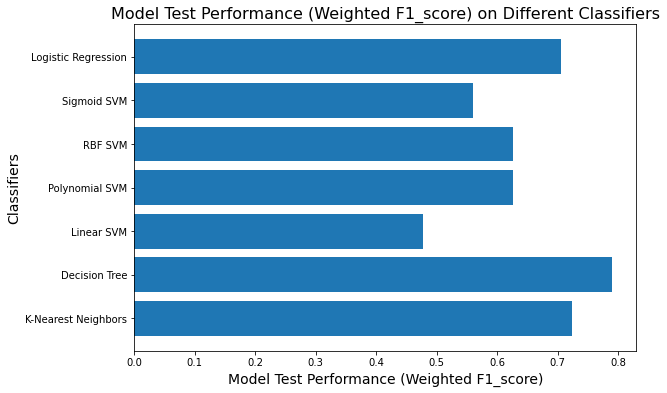

,classifier_0,classifier_1,classifier_2,classifier_3,classifier_4,classifier_5,classifier_6,test_performance
0,K-Nearest Neighbors,Decision Tree,Linear SVM,Polynomial SVM,RBF SVM,Sigmoid SVM,Logistic Regression,0.724015
1,K-Nearest Neighbors,Decision Tree,Linear SVM,Polynomial SVM,RBF SVM,Sigmoid SVM,Logistic Regression,0.790780
2,K-Nearest Neighbors,Decision Tree,Linear SVM,Polynomial SVM,RBF SVM,Sigmoid SVM,Logistic Regression,0.477686
3,K-Nearest Neighbors,Decision Tree,Linear SVM,Polynomial SVM,RBF SVM,Sigmoid SVM,Logistic Regression,0.626420
4,K-Nearest Neighbors,Decision Tree,Linear SVM,Polynomial SVM,RBF SVM,Sigmoid SVM,Logistic Regression,0.626420
5,K-Nearest Neighbors,Decision Tree,Linear SVM,Polynomial SVM,RBF SVM,Sigmoid SVM,Logistic Regression,0.559926
6,K-Nearest Neighbors,Decision Tree,Linear SVM,Polynomial SVM,RBF SVM,Sigmoid SVM,Logistic Regression,0.705998


In [34]:

# Baseline - compare all classifiers
list_clf = []
list_score = []

score_param = "f1_score"
average_param = "weighted"

# Generating results
# ---
# Iterate through all classifiers
for clf in dict_clf_default:
    estimator = { clf: dict_clf_default[clf] }
    try:
        score = train_and_evaluate(estimator, x_train, x_test, y_train, y_test)
        
    except Exception as e:
        error_class_name = e.__class__.__name__
        print("{}: {}\n".format(error_class_name, e))
        continue
        
    print()
    
    list_clf.append(clf)
    list_score = list_score + list(score[clf].values())

    
# Create data frame
# ---
data = dict(classifier=list_clf, test_performance=list_score)
df_performance = pd.DataFrame(data=data)

# # Save and export df_performance to CSV file (optional)
# df_performance.to_csv(r'final_project_performance_default.csv', index = False, hea

# Plotting
# ---
str_x_label = "Model Test Performance ({} {})".format(average_param.capitalize(), score_param.capitalize())
font_size = 12

plt.figure(figsize=(9, 6))
plt.barh(list_clf, list_score)

plt.title("{} on Different Classifiers".format(str_x_label), fontsize=(font_size + 4))
plt.xlabel(str_x_label, fontsize=(font_size + 2))
plt.ylabel("Classifiers", fontsize=(font_size + 2))

plt.show()
# Create data frame
# ---
data = dict()
for i, base_clf in enumerate(list_clf):
    clf_key = "classifier_{}".format(i)
    data[clf_key] = base_clf

data["test_performance"] = list_score
df_performance = pd.DataFrame(data=data)

# Save and export df_performance to CSV file (optional)
#df_performance.to_csv(r'final_project_performance_baseline_{}clf.csv'.format(3), index = False, header = True)

df_performance

# # Save plot into PNG (optional) 
# plt.savefig("final_project_performance_default.png", dpi=300, bbox_inches="tight")

# 3.1Bagging

In [35]:
# Specify classifier
clf_index = 1    # Accepts value from 0 - 6

# Define parameter values for BaggingClassifier object
base = list(dict_clf_default.values())[clf_index]
bagging_param = dict(base_estimator=base,
                     n_estimators=100,    # create 100 different models using the same `base_estimator`
                     random_state=0)

# Define BaggingClassifier object
model_bagging = BaggingClassifier(**bagging_param)

estimator_name = "Bagging - {}".format(list(dict_clf_default.keys())[clf_index])
estimator = {estimator_name: model_bagging}

# Train and evaluate the performance of the bagging classifier
train_and_evaluate(estimator, x_train, x_test, y_train, y_test)

f1_weighted (Validation Bagging - Decision Tree) = 0.8145
f1_weighted (Test Bagging - Decision Tree) = 0.8491
[[  6  24   0]
 [  6 682  35]
 [  0  74 153]]
              precision    recall  f1-score   support

           0       0.50      0.20      0.29        30
           1       0.87      0.94      0.91       723
           2       0.81      0.67      0.74       227

    accuracy                           0.86       980
   macro avg       0.73      0.61      0.64       980
weighted avg       0.85      0.86      0.85       980




{'Bagging - Decision Tree': {'f1_weighted': 0.8490668064973008}}

f1_weighted (Validation K-Nearest Neighbors) = 0.7164
f1_weighted (Test K-Nearest Neighbors) = 0.7342
[[  4  24   2]
 [  5 652  66]
 [  0 142  85]]
              precision    recall  f1-score   support

           0       0.44      0.13      0.21        30
           1       0.80      0.90      0.85       723
           2       0.56      0.37      0.45       227

    accuracy                           0.76       980
   macro avg       0.60      0.47      0.50       980
weighted avg       0.73      0.76      0.73       980



f1_weighted (Validation Decision Tree) = 0.8145
f1_weighted (Test Decision Tree) = 0.8491
[[  6  24   0]
 [  6 682  35]
 [  0  74 153]]
              precision    recall  f1-score   support

           0       0.50      0.20      0.29        30
           1       0.87      0.94      0.91       723
           2       0.81      0.67      0.74       227

    accuracy                           0.86       980
   macro avg       0.73      0.61      0.64       980
weighte

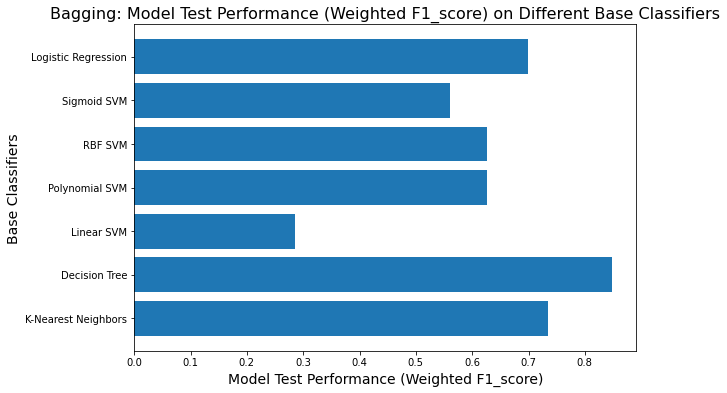

,classifier_0,classifier_1,classifier_2,classifier_3,classifier_4,classifier_5,classifier_6,test_performance
0,K-Nearest Neighbors,Decision Tree,Linear SVM,Polynomial SVM,RBF SVM,Sigmoid SVM,Logistic Regression,0.734196
1,K-Nearest Neighbors,Decision Tree,Linear SVM,Polynomial SVM,RBF SVM,Sigmoid SVM,Logistic Regression,0.849067
2,K-Nearest Neighbors,Decision Tree,Linear SVM,Polynomial SVM,RBF SVM,Sigmoid SVM,Logistic Regression,0.284878
3,K-Nearest Neighbors,Decision Tree,Linear SVM,Polynomial SVM,RBF SVM,Sigmoid SVM,Logistic Regression,0.626420
4,K-Nearest Neighbors,Decision Tree,Linear SVM,Polynomial SVM,RBF SVM,Sigmoid SVM,Logistic Regression,0.626420
5,K-Nearest Neighbors,Decision Tree,Linear SVM,Polynomial SVM,RBF SVM,Sigmoid SVM,Logistic Regression,0.560600
6,K-Nearest Neighbors,Decision Tree,Linear SVM,Polynomial SVM,RBF SVM,Sigmoid SVM,Logistic Regression,0.699712


In [36]:
# Bagging - compare all classifiers
list_clf = []
list_score = []

score_param = "f1_score"
average_param = "weighted"

bagging_param = dict(n_estimators=100, random_state=0)


# Generate results
# ---
# Iterate through all classifiers
for i, clf in enumerate(dict_clf_default):
    base = dict_clf_default[clf]
    
    params = bagging_param.copy()
    params["base_estimator"] = base

    model_bagging = BaggingClassifier(**params)
    
    estimator = { clf: model_bagging }
    
    try:
        score = train_and_evaluate(estimator, x_train, x_test, y_train, y_test)
        
    except Exception as e:
        error_class_name = e.__class__.__name__
        print("{}: {}\n".format(error_class_name, e))
        continue
    
    print()
    
    list_clf.append(clf)
    list_score = list_score + list(score[clf].values())
    # Create data frame
# ---
data = dict(classifier=list_clf, test_performance=list_score)
df_performance = pd.DataFrame(data=data)

# # Save and export df_performance to CSV file (optional)
# df_performance.to_csv(r'final_project_performance_bagging.csv', index = False, header = True)


# Plotting
# ---
str_x_label = "Model Test Performance ({} {})".format(average_param.capitalize(), score_param.capitalize())
font_size = 12

plt.figure(figsize=(9, 6))
plt.barh(list_clf, list_score)

plt.title("Bagging: {} on Different Base Classifiers".format(str_x_label), fontsize=(font_size + 4))
plt.xlabel(str_x_label, fontsize=(font_size + 2))
plt.ylabel("Base Classifiers", fontsize=(font_size + 2))

plt.show()






# Create data frame
# ---
data = dict()
for i, base_clf in enumerate(list_clf):
    clf_key = "classifier_{}".format(i)
    data[clf_key] = base_clf

data["test_performance"] = list_score
df_performance = pd.DataFrame(data=data)

# Save and export df_performance to CSV file (optional)
#df_performance.to_csv(r'final_project_performance_bagging_{}clf.csv'.format(3), index = False, header = True)

df_performance
# # Save plot into PNG (optional) 
# plt.savefig("final_project_performance_bagging.png", dpi=300, bbox_inches="tight")

In [37]:
scaler = StandardScaler()
features = scaler.fit_transform(features)
features[0]


array([ 0.17209696, -0.0817699 ,  0.2132802 ,  2.82134917, -0.035355  ,
        0.56993158,  0.74456503,  2.33151201, -1.24692128, -0.34918426,
       -1.39315246])

# 3.2 boosting


In [38]:

_ = [print("Index: {} - {}".format(i, clf)) for i, clf in enumerate(dict_clf_default)]

Index: 0 - K-Nearest Neighbors
Index: 1 - Decision Tree
Index: 2 - Linear SVM
Index: 3 - Polynomial SVM
Index: 4 - RBF SVM
Index: 5 - Sigmoid SVM
Index: 6 - Logistic Regression


In [39]:
# Specify one classifier
clf_index = 1    # Accepts value from 0 - 6

# Define parameter values for AdaBoostClassifier object
base = list(dict_clf_default.values())[clf_index]
boosting_param = dict(base_estimator=base,
                     n_estimators=100,
                     random_state=0)

# Define AdaBoostClassifier object
model_boosting = AdaBoostClassifier(**boosting_param)

estimator_name = "Boosting - {}".format(list(dict_clf_default.keys())[clf_index])
estimator = {estimator_name: model_boosting}

# Train and evaluate the performance of the AdaBoost classifier
train_and_evaluate(estimator, x_train, x_test, y_train, y_test)


f1_weighted (Validation Boosting - Decision Tree) = 0.7709
f1_weighted (Test Boosting - Decision Tree) = 0.7810
[[ 12  16   2]
 [ 36 588  99]
 [  5  66 156]]
              precision    recall  f1-score   support

           0       0.23      0.40      0.29        30
           1       0.88      0.81      0.84       723
           2       0.61      0.69      0.64       227

    accuracy                           0.77       980
   macro avg       0.57      0.63      0.59       980
weighted avg       0.79      0.77      0.78       980




{'Boosting - Decision Tree': {'f1_weighted': 0.780997078167408}}

In [40]:
# SVM Boosting 
clf_index = 2    # Accepts value from 0 - 6

# Define parameter values for AdaBoostClassifier object
base = list(dict_clf_default.values())[clf_index]
boosting_param = dict(base_estimator=base,
                     n_estimators=100,
                     algorithm='SAMME',random_state=0)

# Define AdaBoostClassifier object
model_boosting = AdaBoostClassifier(**boosting_param)
#model_boosting = AdaBoostClassifier((svm.SVC(probability=True,kernel='linear'),n_estimators=50,learning_rate=1.0,algorithm='SAMME')

estimator_name = "Boosting - {}".format(list(dict_clf_default.keys())[clf_index])
estimator = {estimator_name: model_boosting}

# Train and evaluate the performance of the AdaBoost classifier
train_and_evaluate(estimator, x_train, x_test, y_train, y_test)

f1_weighted (Validation Boosting - Linear SVM) = 0.6406
f1_weighted (Test Boosting - Linear SVM) = 0.6264
[[  0  30   0]
 [  0 723   0]
 [  0 227   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.74      1.00      0.85       723
           2       0.00      0.00      0.00       227

    accuracy                           0.74       980
   macro avg       0.25      0.33      0.28       980
weighted avg       0.54      0.74      0.63       980




{'Boosting - Linear SVM': {'f1_weighted': 0.6264203626253789}}

- K-Nearest Neighbors
f1_weighted (Validation K-Nearest Neighbors) = 0.6406
f1_weighted (Test K-Nearest Neighbors) = 0.6264
[[  0  30   0]
 [  0 723   0]
 [  0 227   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.74      1.00      0.85       723
           2       0.00      0.00      0.00       227

    accuracy                           0.74       980
   macro avg       0.25      0.33      0.28       980
weighted avg       0.54      0.74      0.63       980



- Decision Tree
f1_weighted (Validation Decision Tree) = 0.6406
f1_weighted (Test Decision Tree) = 0.6264
[[  0  30   0]
 [  0 723   0]
 [  0 227   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.74      1.00      0.85       723
           2       0.00      0.00      0.00       227

    accuracy                           0.74       980
   macro avg       0.25

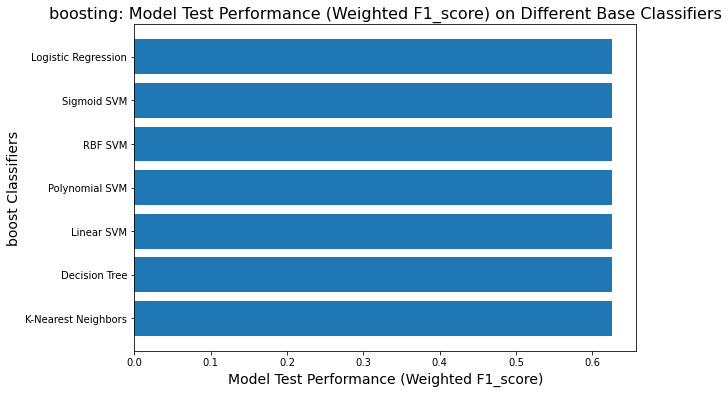

,classifier_0,classifier_1,classifier_2,classifier_3,classifier_4,classifier_5,classifier_6,test_performance
0,K-Nearest Neighbors,Decision Tree,Linear SVM,Polynomial SVM,RBF SVM,Sigmoid SVM,Logistic Regression,0.62642
1,K-Nearest Neighbors,Decision Tree,Linear SVM,Polynomial SVM,RBF SVM,Sigmoid SVM,Logistic Regression,0.62642
2,K-Nearest Neighbors,Decision Tree,Linear SVM,Polynomial SVM,RBF SVM,Sigmoid SVM,Logistic Regression,0.62642
3,K-Nearest Neighbors,Decision Tree,Linear SVM,Polynomial SVM,RBF SVM,Sigmoid SVM,Logistic Regression,0.62642
4,K-Nearest Neighbors,Decision Tree,Linear SVM,Polynomial SVM,RBF SVM,Sigmoid SVM,Logistic Regression,0.62642
5,K-Nearest Neighbors,Decision Tree,Linear SVM,Polynomial SVM,RBF SVM,Sigmoid SVM,Logistic Regression,0.62642
6,K-Nearest Neighbors,Decision Tree,Linear SVM,Polynomial SVM,RBF SVM,Sigmoid SVM,Logistic Regression,0.62642


In [41]:
# Compare all classifiers
list_clf = []
list_score = []

score_param = "f1_score"
average_param = "weighted"

feature_train = x_train
feature_test = x_test

# Initialize parameter values of boosting classifier
boosting_param = dict(n_estimators=100,random_state=0)

# Loop through all classifiers
# ---
for i, clf in enumerate(dict_clf_default):
    print("- {}".format(clf))
    base = dict_clf_default[clf]
    
    if i<1:
        params = boosting_param.copy()
    else:
        params = dict(n_estimators=100,algorithm='SAMME',random_state=0)
    
    params["base_estimator"] = base
    
    
    estimator = { clf: model_boosting }
    
    try:
        score = train_and_evaluate(estimator, x_train, x_test, y_train, y_test)
    
    except Exception as e:
        error_class_name = e.__class__.__name__
        print("{}: {}\n".format(error_class_name, e))
        continue
    
    print()
    
    list_clf.append(clf)
    list_score = list_score + list(score[clf].values())
    # Create data frame
# ---
data = dict(classifier=list_clf, test_performance=list_score)
df_performance = pd.DataFrame(data=data)

# # Save and export df_performance to CSV file
# df_performance.to_csv(r'final_project_performance_boosting.csv', index = False, header = True)

# Plotting
# ---
str_x_label = "Model Test Performance ({} {})".format(average_param.capitalize(), score_param.capitalize())
font_size = 12

plt.figure(figsize=(9, 6))
plt.barh(list_clf, list_score)

plt.title("boosting: {} on Different Base Classifiers".format(str_x_label), fontsize=(font_size + 4))
plt.xlabel(str_x_label, fontsize=(font_size + 2))
plt.ylabel("boost Classifiers", fontsize=(font_size + 2))

plt.show()

##Save plot into PNG (optional) 
##plt.savefig("final_project_performance_boosting.png", dpi=300, bbox_inches="tight")
# Create data frame
# ---
data = dict()
for i, base_clf in enumerate(list_clf):
    clf_key = "classifier_{}".format(i)
    data[clf_key] = base_clf

data["test_performance"] = list_score
df_performance = pd.DataFrame(data=data)

# Save and export df_performance to CSV file (optional)
#df_performance.to_csv(r'final_project_performance_boosting_{}clf.csv'.format(3), index = False, header = True)

df_performance
    

# 3.3 Voting

In [42]:
score_param = "f1_score"
average_param = "macro"

# specify number of base classifiers
num_base_clf = 3                                # Accepts values from 2 - 4 (number of base classifiers)
list_clf = [[] for i in range(num_base_clf)]    # 2-dimensional list, to store list of classifiers in
                                                # each voting classifier
list_score = []

# Generate all possible combinations of base classifiers with # of classifiers = num_base_clf
# ---
# For example: if num_base_clf = 3, 
# [A, B, C, D] -> [A, B, C], [A, B, D], [A, C, D] and [B, C, D]
combinations_base_clf = itertools.combinations(dict_clf_default, num_base_clf)

# Iterate through all generated lists
for comb in combinations_base_clf:
    list_base_clf = []
    
    # Return number of SVM classifiers in a list
    count_svm = sum("SVM" in clf for clf in comb)    
    
    # At most one SVM classifier in the list.
    # - skip all the lists with >1 classifiers - speed up iteration
    # - ensure variation in machine learning algorithms in the voting classifier
    if count_svm <= 1:
        for i, clf in enumerate(comb):
            list_base_clf.append((clf, dict_clf_default[clf]))
            list_clf[i].append(clf)
    
        print(comb)
        print("---")
        
        try:
            model_voting = VotingClassifier(estimators=list_base_clf)
            estimator_name = "Voting Classifier"
            estimator = { estimator_name : model_voting }
            score = train_and_evaluate(estimator, x_train, x_test, y_train, y_test)
            
            list_score = list_score + list(score[estimator_name].values())
            
        except Exception as e:
            error_class_name = e.__class__.__name__
            print("{}: {}\n".format(error_class_name, e))
            continue
        
        print()

        
# Create data frame
# ---
data = dict()
for i, base_clf in enumerate(list_clf):
    clf_key = "classifier_{}".format(i)
    data[clf_key] = base_clf

data["test_performance"] = list_score
df_performance = pd.DataFrame(data=data)

# Save and export df_performance to CSV file (optional)
#df_performance.to_csv(r'final_project_performance_voting_{}clf.csv'.format(3), index = False, header = True)

df_performance
            

('K-Nearest Neighbors', 'Decision Tree', 'Linear SVM')
---
f1_weighted (Validation Voting Classifier) = 0.7176
f1_weighted (Test Voting Classifier) = 0.7234
[[ 11  17   2]
 [107 591  25]
 [ 75  80  72]]
              precision    recall  f1-score   support

           0       0.06      0.37      0.10        30
           1       0.86      0.82      0.84       723
           2       0.73      0.32      0.44       227

    accuracy                           0.69       980
   macro avg       0.55      0.50      0.46       980
weighted avg       0.80      0.69      0.72       980



('K-Nearest Neighbors', 'Decision Tree', 'Polynomial SVM')
---
f1_weighted (Validation Voting Classifier) = 0.7333
f1_weighted (Test Voting Classifier) = 0.7496
[[  3  25   2]
 [  2 705  16]
 [  0 160  67]]
              precision    recall  f1-score   support

           0       0.60      0.10      0.17        30
           1       0.79      0.98      0.87       723
           2       0.79      0.30      0.43 

,classifier_0,classifier_1,classifier_2,test_performance
0,K-Nearest Neighbors,Decision Tree,Linear SVM,0.723357
1,K-Nearest Neighbors,Decision Tree,Polynomial SVM,0.749638
2,K-Nearest Neighbors,Decision Tree,RBF SVM,0.749638
3,K-Nearest Neighbors,Decision Tree,Sigmoid SVM,0.747841
4,K-Nearest Neighbors,Decision Tree,Logistic Regression,0.768903
5,K-Nearest Neighbors,Linear SVM,Logistic Regression,0.668365
6,K-Nearest Neighbors,Polynomial SVM,Logistic Regression,0.670409
7,K-Nearest Neighbors,RBF SVM,Logistic Regression,0.670409
8,K-Nearest Neighbors,Sigmoid SVM,Logistic Regression,0.680158
9,Decision Tree,Linear SVM,Logistic Regression,0.700015


In [43]:
# voting 
from sklearn.ensemble import RandomForestClassifier
clf_index = 1    # Accepts value from 0 - 6

log = LogisticRegression()
rnd = RandomForestClassifier()
svm = SVC()


# Define VotingClassifier object
model_boosting = VotingClassifier(estimators=[('lr',log), ('rf',rnd), ('svm',svm)],voting='hard')

estimator_name = "Voting - {}".format(list(dict_clf_default.keys())[clf_index])
estimator = {estimator_name: model_boosting}

# Train and evaluate the performance of the Voting classifier
train_and_evaluate(estimator, x_train, x_test, y_train, y_test)


f1_weighted (Validation Voting - Decision Tree) = 0.6928
f1_weighted (Test Voting - Decision Tree) = 0.7127
[[  0  30   0]
 [  0 709  14]
 [  0 180  47]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.77      0.98      0.86       723
           2       0.77      0.21      0.33       227

    accuracy                           0.77       980
   macro avg       0.51      0.40      0.40       980
weighted avg       0.75      0.77      0.71       980




{'Voting - Decision Tree': {'f1_weighted': 0.7127136121399431}}

In [44]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier

# 3.4 stacking

# Stacking-single

In [45]:
# Define StackingClassifier object
estimators = [ ('rf', RandomForestClassifier(random_state=42)),
             ('nk',KNeighborsClassifier())]

model_boosting = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

estimator_name = "Stacking - {}".format(list(dict_clf_default.keys())[clf_index])
estimator = {estimator_name: model_boosting}

# Train and evaluate the performance of the Voting classifier
train_and_evaluate(estimator, x_train, x_test, y_train, y_test)


f1_weighted (Validation Stacking - Decision Tree) = 0.8125
f1_weighted (Test Stacking - Decision Tree) = 0.8568
[[  7  23   0]
 [  6 686  31]
 [  0  72 155]]
              precision    recall  f1-score   support

           0       0.54      0.23      0.33        30
           1       0.88      0.95      0.91       723
           2       0.83      0.68      0.75       227

    accuracy                           0.87       980
   macro avg       0.75      0.62      0.66       980
weighted avg       0.86      0.87      0.86       980




{'Stacking - Decision Tree': {'f1_weighted': 0.8568367998238683}}

In [46]:
dict_clf_default = {
    "K-Nearest Neighbors": KNeighborsClassifier(), 
    "Decision Tree": DecisionTreeClassifier(random_state=0),
    "Linear SVM": SVC(kernel='linear', max_iter=1500), 
    "Polynomial SVM": SVC(kernel='poly', max_iter=1500), 
    "RBF SVM": SVC(kernel='rbf', max_iter=1500), 
    "Sigmoid SVM": SVC(kernel='sigmoid', max_iter=1500),
    "Logistic Regression": LogisticRegression()
    }

# Stacking- three random group

In [47]:
score_param = "f1_score"
average_param = "macro"

# specify number of base classifiers
num_base_clf = 3                                # Accepts values from 2 - 4 (number of base classifiers)
list_clf = [[] for i in range(num_base_clf)]    # 2-dimensional list, to store list of classifiers in
                                                # each voting classifier
list_score = []

# For example: if num_base_clf = 3, 
# [A, B, C, D] -> [A, B, C], [A, B, D], [A, C, D] and [B, C, D]
combinations_base_clf = itertools.combinations(dict_clf_default, num_base_clf)

nameList=[]
listAll=[]
for comb in combinations_base_clf:
    nameList.append(comb)
    list1=[]
    for name in comb:
       
        list1.append((name, dict_clf_default.get(name)))
    listAll.append(list1)

# Iterate through all generated lists
i=0
for comb in listAll:
    print(nameList[i])
    print("---")
    i+=1
    try:
        model_voting = StackingClassifier(estimators=comb, final_estimator=LogisticRegression())
        estimator_name = "Stacking Classifier"
        estimator = { estimator_name : model_voting }
        score = train_and_evaluate(estimator, x_train, x_test, y_train, y_test)

        list_score = list_score + list(score[estimator_name].values())

    except Exception as e:
        error_class_name = e.__class__.__name__
        print("{}: {}\n".format(error_class_name, e))
        continue

    print("------------------------------------------------------------------------------")



    
    
    
    
    
    
    
    
    
    
            

('K-Nearest Neighbors', 'Decision Tree', 'Linear SVM')
---
f1_weighted (Validation Stacking Classifier) = 0.7703
f1_weighted (Test Stacking Classifier) = 0.7916
[[  3  25   2]
 [  3 673  47]
 [  0 110 117]]
              precision    recall  f1-score   support

           0       0.50      0.10      0.17        30
           1       0.83      0.93      0.88       723
           2       0.70      0.52      0.60       227

    accuracy                           0.81       980
   macro avg       0.68      0.52      0.55       980
weighted avg       0.79      0.81      0.79       980


------------------------------------------------------------------------------
('K-Nearest Neighbors', 'Decision Tree', 'Polynomial SVM')
---
f1_weighted (Validation Stacking Classifier) = 0.7730
f1_weighted (Test Stacking Classifier) = 0.8149
[[  3  25   2]
 [  3 668  52]
 [  0  87 140]]
              precision    recall  f1-score   support

           0       0.50      0.10      0.17        30
           1

f1_weighted (Validation Stacking Classifier) = 0.7132
f1_weighted (Test Stacking Classifier) = 0.7131
[[  1  29   0]
 [  2 673  48]
 [  0 164  63]]
              precision    recall  f1-score   support

           0       0.33      0.03      0.06        30
           1       0.78      0.93      0.85       723
           2       0.57      0.28      0.37       227

    accuracy                           0.75       980
   macro avg       0.56      0.41      0.43       980
weighted avg       0.72      0.75      0.71       980


------------------------------------------------------------------------------
('K-Nearest Neighbors', 'Sigmoid SVM', 'Logistic Regression')
---
f1_weighted (Validation Stacking Classifier) = 0.7085
f1_weighted (Test Stacking Classifier) = 0.7182
[[  1  29   0]
 [  1 674  48]
 [  0 161  66]]
              precision    recall  f1-score   support

           0       0.50      0.03      0.06        30
           1       0.78      0.93      0.85       723
           2  

f1_weighted (Validation Stacking Classifier) = 0.6406
f1_weighted (Test Stacking Classifier) = 0.6264
[[  0  30   0]
 [  0 723   0]
 [  0 227   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.74      1.00      0.85       723
           2       0.00      0.00      0.00       227

    accuracy                           0.74       980
   macro avg       0.25      0.33      0.28       980
weighted avg       0.54      0.74      0.63       980


------------------------------------------------------------------------------
('Linear SVM', 'Polynomial SVM', 'Logistic Regression')
---
f1_weighted (Validation Stacking Classifier) = 0.6992
f1_weighted (Test Stacking Classifier) = 0.7147
[[  0  30   0]
 [  1 667  55]
 [  0 158  69]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.78      0.92      0.85       723
           2       0

# Experiment Set 3: conclusion


boosting is the best ensemble  method

# Experiment Set 4: Vary Training Sample Size


In [14]:
import numpy as np
import pandas as pd
import gdal
import os
import glob
import random
import matplotlib
import matplotlib.pyplot as plt

from matplotlib import style
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_selection import SelectKBest, chi2

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV

The best model throughout the Experiment Set 1 is the **KNN classifier**
(parameters(n_neighbors=11,p=1,weights='distance'))

The best model throughout the Experiment Set 2 is the **decisiontree classifier with top 7 features**. (parameters(criterion = 'entropy', max_depth=7).

The overall best model throughout the experiment is the **Bagging model** obtained from Experiment Set 3. And the best-performing base model is decisiontree.

So in this step I choose these three models :
Experiment Set 1: KNN classifier with the best parameter

Experiment Set 2: Decision Tree classifier with top 7 features

Experiment Set 3: Bagging classifier with decision tree as the base estimator

and we generate 10 subsamples from the original training set to test the effect of varying training sample size to each of the best models from the list above.

In [16]:
df = pd.read_csv("winequality-preprocess.csv")

df['quality'].value_counts()
target = df['quality']
# Indicate the columns that will serve as features
features = df.drop('quality', axis = 1)
features.head(1)
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)

# Generate 9+1 subsamples from the original training set.
num_subsamples = 10

#  Define lists to store subsamples (features and targets) of the original training set.
x_train_subs = []
y_train_subs = []

# Iterate 9 (=10-1) times to generate 9 smaller training sets
# - `train_size` must be a float between 0 and 1 (exclusive)
# - `random_state=0`: controls the split so that smaller subsamples are always a subset
# larger subsample
for k in range(num_subsamples - 1):
    x_train_sub, _, y_train_sub, _ = train_test_split(x_train, y_train,
                                                      train_size=((k+1) / 10),    # 0.1, 0.2, ..., 0.9
                                                      random_state=0)
    
    # Append subsample to subsample list
    x_train_subs.append(x_train_sub)
    y_train_subs.append(y_train_sub)
    
# Append the full training sample to the list of subsamples
x_train_subs.append(x_train)
y_train_subs.append(y_train)


In [17]:
def draw(name,x,y1,y2,i):
    style.use('ggplot')
    plt.xlabel('Percentage of Training Set', fontsize=18)
    plt.ylabel(name+' Score', fontsize=18)
    plt.title(i+' Versus Training Set Size', fontsize=18)
    plt.plot(x, y1, color="lightcoral", linewidth=3.0, linestyle="-", label="Validation")
    plt.plot(x, y2, color="burlywood", linewidth=3.0, linestyle="--", label="Test")
    plt.legend(loc="best")
    plt.show()
# Helper function #8

In [18]:
def train_and_evaluate_vary_size(estimator, x_train_list, x_test, y_train_list, y_test,name,i,function):
    # Train and evaluate
    # Initialize 3 empty lists to store the values of k, validation and test scores
    # Initialize 1 empty dictionary (scores) to store k:validation score/test score(key:value) pairs
    K = [] 
    validationmacro = []

    testmacro = []
    score_test = []
    scores_val=[]
    scores= {}
    score_val_mean = 0
    for k, (x_train, y_train) in enumerate(zip(x_train_list, y_train_list)):
        # 10-fold cross validation
        # Calculate the model's validation score using 10-fold cross-validation
        if(function == 'f1_weighted'):
            scores_val = cross_val_score(estimator, x_train, y_train, cv = 10, scoring = function)
            # Calculate the average validation score
            score_val_mean = scores_val.mean()


        # train and test
        # Fit and train the model on the training data of the subsamples.
        estimator.fit(x_train, y_train)

        # Predicted the results.
        test_predict = estimator.predict(x_test)

        # Calculate the test score by comparing the actual and predicted results.
        if(function == 'f1_weighted'):
            score_test = metrics.f1_score(y_test, test_predict, average='weighted')
        # update list
        # ---
        key = k + 1
        K.append(key)

        validationmacro.append(score_val_mean)
        testmacro.append(score_test)

        # A dictionary holds key:value pairs, and stores the validation score for each value of k.
        scores[key] = (score_val_mean, score_test)

    if(function == 'f1_weighted'):
        print('F1 weighted score outcome:')


    # Print the results
    print("Subsample (%): score (Validation | Test)")
    x=[]
    y1=[]
    y2=[]
    for key_score in scores:
        #Get the train score
        score_val = scores[key_score][0]
        #Get the test score
        score_test = scores[key_score][1]
        print("{:.1f}%: ({:.4f} | {:.4f})".format(key_score*10, score_val, score_test))
        x.append(key_score*10)
        y1.append(score_val)
        y2.append(score_test)
    style.use('ggplot')
    plt.xlabel('Percentage of Training Set', fontsize=18)
    plt.ylabel(name+' Score', fontsize=18)
    plt.title(i+'Versus Training Set Size', fontsize=18)
    plt.plot(x, y1, color="lightcoral", linewidth=3.0, linestyle="-", label="Validation")
    plt.plot(x, y2, color="burlywood", linewidth=3.0, linestyle="--", label="Test")
    plt.legend(loc="best")
    plt.show()

# 4.1: Best Model from Experiment Set 1
KNN model with best parameter

In [19]:
# Defining a KNN Classifier

KNN = KNeighborsClassifier(n_neighbors=11,p=1,weights='distance')



**4.1.1: f1_weighted versus traning set size**
outcome:

F1 weighted score outcome:
Subsample (%): score (Validation | Test)
10.0%: (0.6993 | 0.6700)
20.0%: (0.7401 | 0.7050)
30.0%: (0.7463 | 0.7222)
40.0%: (0.7436 | 0.7254)
50.0%: (0.7632 | 0.7429)
60.0%: (0.7716 | 0.7466)
70.0%: (0.7652 | 0.7708)
80.0%: (0.7711 | 0.7743)
90.0%: (0.7793 | 0.7839)
100.0%: (0.7847 | 0.7860)


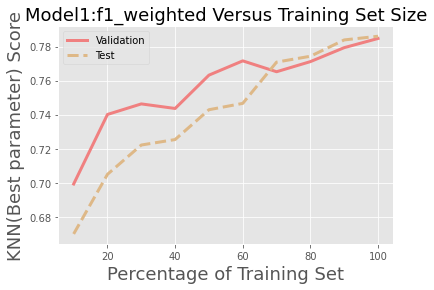

In [20]:
train_and_evaluate_vary_size(KNN, x_train_subs, x_test, y_train_subs, y_test,"KNN(Best parameter)",'Model1:f1_weighted ','f1_weighted')


In [21]:
# Helper function #Define a helper function to get the specified number of feature lists according to the Chi-squared() method.
def get_chi2_features(X, Y, num_k=10):
    # create a selector
    # set k: we need the first k features
    selector = SelectKBest(chi2, k=num_k)
    
    x_new = selector.fit_transform(X, Y)
    col_index = selector.get_support(indices=True)    # Get the index
    
    cols = X.columns[col_index]                       # Get the name of the feature/column
    
    return cols

In [22]:
cols = get_chi2_features(x_train, y_train, num_k=10)

x_train_chi2 = x_train[cols]
x_test_chi2 = x_test[cols]

x_train_sub_chi2 = []
for k in range(num_subsamples - 1):
    x_train_sub, _, _, _ = train_test_split(x_train_chi2, y_train,
                                            train_size=((k+1) / 10),
                                            random_state=0)
    x_train_sub_chi2.append(x_train_sub)


x_train_sub_chi2.append(x_train_chi2)

# 4.2: Best Model from Experiment Set 2
The results for max_depth=7 and =10 are similar and both are the best.

In [23]:
# Defining a DecisionTree Classifier

Dtree = DecisionTreeClassifier(criterion = 'entropy', max_depth=7)


**4.2.1: f1_weighted versus traning set size**
outcome:

F1 weighted score outcome:
Subsample (%): score (Validation | Test)
10.0%: (0.6918 | 0.7238)
20.0%: (0.7285 | 0.7466)
30.0%: (0.7337 | 0.7223)
40.0%: (0.7389 | 0.7362)
50.0%: (0.7377 | 0.7516)
60.0%: (0.7371 | 0.7656)
70.0%: (0.7452 | 0.7350)
80.0%: (0.7414 | 0.7465)
90.0%: (0.7426 | 0.7427)
100.0%: (0.7524 | 0.7702)


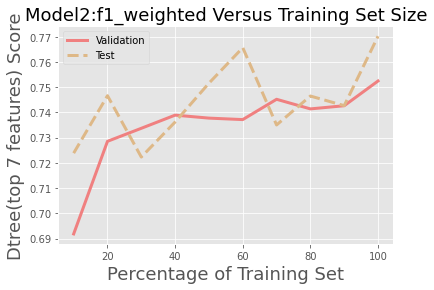

In [24]:
train_and_evaluate_vary_size(Dtree, x_train_sub_chi2, x_test_chi2, y_train_subs,y_test,"Dtree(top 7 features)",'Model2:f1_weighted ','f1_weighted')

# 4.3: Best Model from Experiment Set 3**

In [25]:
# Defining a Bagging Classifier

model_bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=0),
                                  n_estimators=100, random_state=0)


**4.3.1: f1_weighted versus traning set size**
outcome:

F1 weighted score outcome:
Subsample (%): score (Validation | Test)
10.0%: (0.7480 | 0.7323)
20.0%: (0.7614 | 0.7570)
30.0%: (0.7782 | 0.7762)
40.0%: (0.7698 | 0.7967)
50.0%: (0.7879 | 0.8038)
60.0%: (0.7918 | 0.8180)
70.0%: (0.8002 | 0.8298)
80.0%: (0.8078 | 0.8374)
90.0%: (0.8120 | 0.8437)
100.0%: (0.8203 | 0.8553)


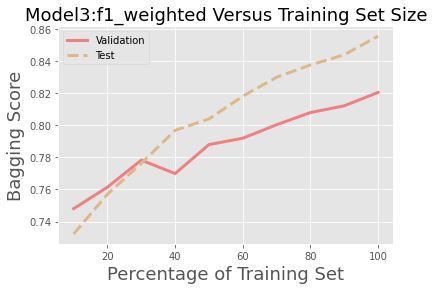

In [13]:
train_and_evaluate_vary_size(model_bagging, x_train_sub_chi2, x_test_chi2, y_train_subs,y_test,"Bagging",'Model3:f1_weighted ','f1_weighted')

# Experiment Set 4 summary

1.For Classification with F1 as metric, Model 3 performs best with highest value.

2.Changing the sample size has little effect on the results of model 2.

3.For Classification, as the training set size increases, all the models show increasing trend.
